# Spotify Song Genre Clustering
Author: Christian Sarmiento <br>
Class: DATA 450 - Data Mining <br>
Professor: Dr. Gissella Bejarano <br>
Submission Date: December 3rd, 2023 <br>
Purpose: Use Spotify data and its unique attributes to cluster a dataset by its genre and assess which algorithm is best. <br>
Algorithms: SKlearn KMeans, SciPy Agglomerative Hierarichal - Ward's Linkage <br>
Source Data: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset <br>
Additional Sources: <br>
- https://www.mathworks.com/help/stats/cophenet.html
- https://python.plainenglish.io/agglomerative-hierarchical-clustering-using-scipy-c50b150f3abd
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html
- https://www.kaggle.com/code/anandchauhan/hierarchical-clustering-customer-spend-dataset/notebook#4.-Building-the-Dendrogram
- https://github.com/trevorData/RYMGenres/blob/master/RYMDescriptors.R 
- https://www.reddit.com/r/dataisbeautiful/comments/blwed1/using_machine_learning_to_create_a_music_genre/
- https://hdbscan.readthedocs.io/en/latest/performance_and_scalability.html
- https://towardsdatascience.com/k-means-clustering-using-spotify-song-features-9eb7d53d105c
- https://scikit-learn.org/stable/modules/clustering.html#k-means

In [1]:
# Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import fastcluster  # Fast Agglomerative Hierarichal Clustering
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage  # Plotting & Assessing Hierarichal Clusters 
from scipy.spatial.distance import pdist  # More for Hierarichal Assessment
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import 114k Record Dataset
path = '/Users/christiansarmiento/Library/CloudStorage/OneDrive-MaristCollege/Data Mining & Predictive Analytics/Spotify Genre Classifier/114k_spotify_song_records.csv'
songs = pd.read_csv(path)

## Preprocessing & Observations

In [3]:
# Dropping random unnamed variable
songs = songs.drop(['Unnamed: 0'], axis=1)
#Take a look
songs.head()

track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

In [4]:
# Sample to get a better look at genre 
sample = songs.sample(28500)  # 1/4 of data
sample.head(30)

track_id  \
19193   3yZ99lIQVH3U8EuNtieRWn   
618     1pIMxRddmCGalHnRbLFkWg   
60547   2M9JM4UxTQTzv1EMahqaty   
63314   6tAWgyIwWB6f1ozhA0tadW   
63887   4UcYBGMfhjLedTgyzLhggX   
97369   6YdjKSjVCnaG4Snrkxmv9a   
61805   0GVIXOnvGKXkVqDuoDNuVj   
69086   23pcAYyfYEaxlA0fgA4jZJ   
2327    5S9KnOMLC5vRckzbvzasEs   
99447   20ElUw6wK2R29yY6WLeyC7   
47293   0Qnr5TKNz4vlYwlSBhtv8y   
37875   7M3BffkC4FfUCR5CgJC2Ce   
106320  7gHm7S9qBELTvF7rvWWbFS   
70069   2YzJaHvzsEb1LzGugXIduK   
112460  4GVzBVrDce2kS5TDQBMUJ5   
42580   3K33CSfFNzUegttunbqATx   
68929   7trX995xQ3AdG8LW4OCZb3   
110030  1jT2yBR6qi5mrGwFGIeKmR   
77625   6dlaRHrKIA1v1jBB7wE4VP   
110358  6n2OgfyvY0MuwFphEywfgz   
98463   4riCZ3C7FiUg3SRd7JBU0p   
67003   7i06j7x2UzGnURlzGV37WL   
84681   6rHh8urosEFRI67xVa6fzU   
58780   5hfA2BeYLbBukMAPXJNzdI   
27250   76W3fLYn2e4fUeDQJaFdml   
95189   034HIrJlfbxFyXJFiEMH1K   
68058   7Lf5l4hbjlZIV6iQ3nR0YV   
46013   0uXKvyCtukUSVFfHo7YFdV   
61618   51G8MNBnK1IdN5XQpUfScE   
37507   6JSedYl1Y7I5Wax8A1UYM9   

                                                  artists  \
19193                                       Kenny Chesney   
618                                            Jason Mraz   
60547                                            DJ Furax   
63314                                        Monkey Majik   
63887                                      My Hair is Bad   
97369                               João Bosco & Vinicius   
61805                                    Momoiro Clover Z   
69086                                             Sujatha   
2327                                           Hoobastank   
99447                                    Sturgill Simpson   
47293                                        White Zombie   
37875   MC Rodolfinho;Mc Danado;MC Guime;MC Lon;Mc Neg...   
106320                                    Vargas & Lagola   
70069                                            Jay Chou   
112460                                                MFÖ   
42580                                        Napalm Death   
68929                                       Yaga & Mackie   
110030                                     Tiësto;Ava Max   
77625                                      Vou pro Sereno   
110358                      Electric Universe;Ace Ventura   
98463                Audra McDonald;Brian Stokes Mitchell   
67003                              Daddy Yankee;Bad Bunny   
84681                                         The Beatles   
58780                                           Sevendust   
27250               DJ Fresh;Diplo;Dominique Young Unique   
95189                                     Víctor Manuelle   
68058                 J Balvin;Bad Bunny;Marciano Cantero   
46013                                 The Viper;Korsakoff   
61618                                       Dempagumi.Inc   
37507                             Mc Davi;MC Ryan SP;Gaab   

                                               album_name  \
19193                                    Laidback Country   
618                                           Have It All   
60547                           Best of 20 Years of Music   
63314   MONKEY MAJIK BEST (Special Selection Edition b...   
63887                                         hadaka e.p.   
97369                                        Não Era Você   
61805                                                田中将大   
69086   Chronic Bachelor (Original Motion Picture Soun...   
2327                                Обратно в клас - rock   
99447                                    Country Car Hits   
47293                         Halloween Spooky Party 2022   
37875                                      Lendas do Funk   
106320                                         LUGNA HITS   
70069                                              11月的蕭邦   
112460                          Ele Güne Karşı Yapayalnız   
42580                                      Smear Campaign   
68929                             Los 

In [5]:
# Our main focus in distribution should be in genre 
genreCounts = songs['track_genre'].value_counts()

for genre in genreCounts:
    if genre != 1000:
        print("unequal")
        
print("done")

# All genres have exactly 1000 records 

done


In [6]:
print(f"mean: {songs['popularity'].mean()}")
print(f"median: {songs['popularity'].median()}")
print(f"standard deviation: {songs['popularity'].std()}")

mean: 33.2385350877193
median: 35.0
standard deviation: 22.305078493368146


A little bit of left skew, as seen as by the density plot and mean < median.
Makes sense since you would probably have a lot more unpopular songs than popular.
Varies a good a decent amount tho, st. dev. = 22.21.
Passes, but I suggest maybe normalizing before running model.

In [7]:
# Check for NAs 
songs.notnull().sum()

track_id            114000
artists             113999
album_name          113999
track_name          113999
popularity          114000
duration_ms         114000
explicit            114000
danceability        114000
energy              114000
key                 114000
loudness            114000
mode                114000
speechiness         114000
acousticness        114000
instrumentalness    114000
liveness            114000
valence             114000
tempo               114000
time_signature      114000
track_genre         114000
dtype: int64

Only 1 null in artists, track_name, and album_name, which are attributes that we will only look at for checking duplicates not for any meaningful analysis/model.

In [8]:
# Check for duplicates
songs.duplicated().sum()
songs = songs.drop_duplicates()

450 exact duplicates - let's see if there are any inexact duplicates, AKA artists who may have released a single before the album and still have the single on the album, resulting in the same song in two different places. 

In [9]:
# Check for inexact duplicates 

# The only thing that would change here would be the album name & track_id  
# so lets drop that attribute for now and check
inexactDup = songs.drop(['album_name', 'track_id'], axis=1)

# Check for duplicates
print(inexactDup.duplicated().sum())

# Drop those duplicates
songAttributes = inexactDup.drop_duplicates()

6601


6601 inexact duplicates dropped.

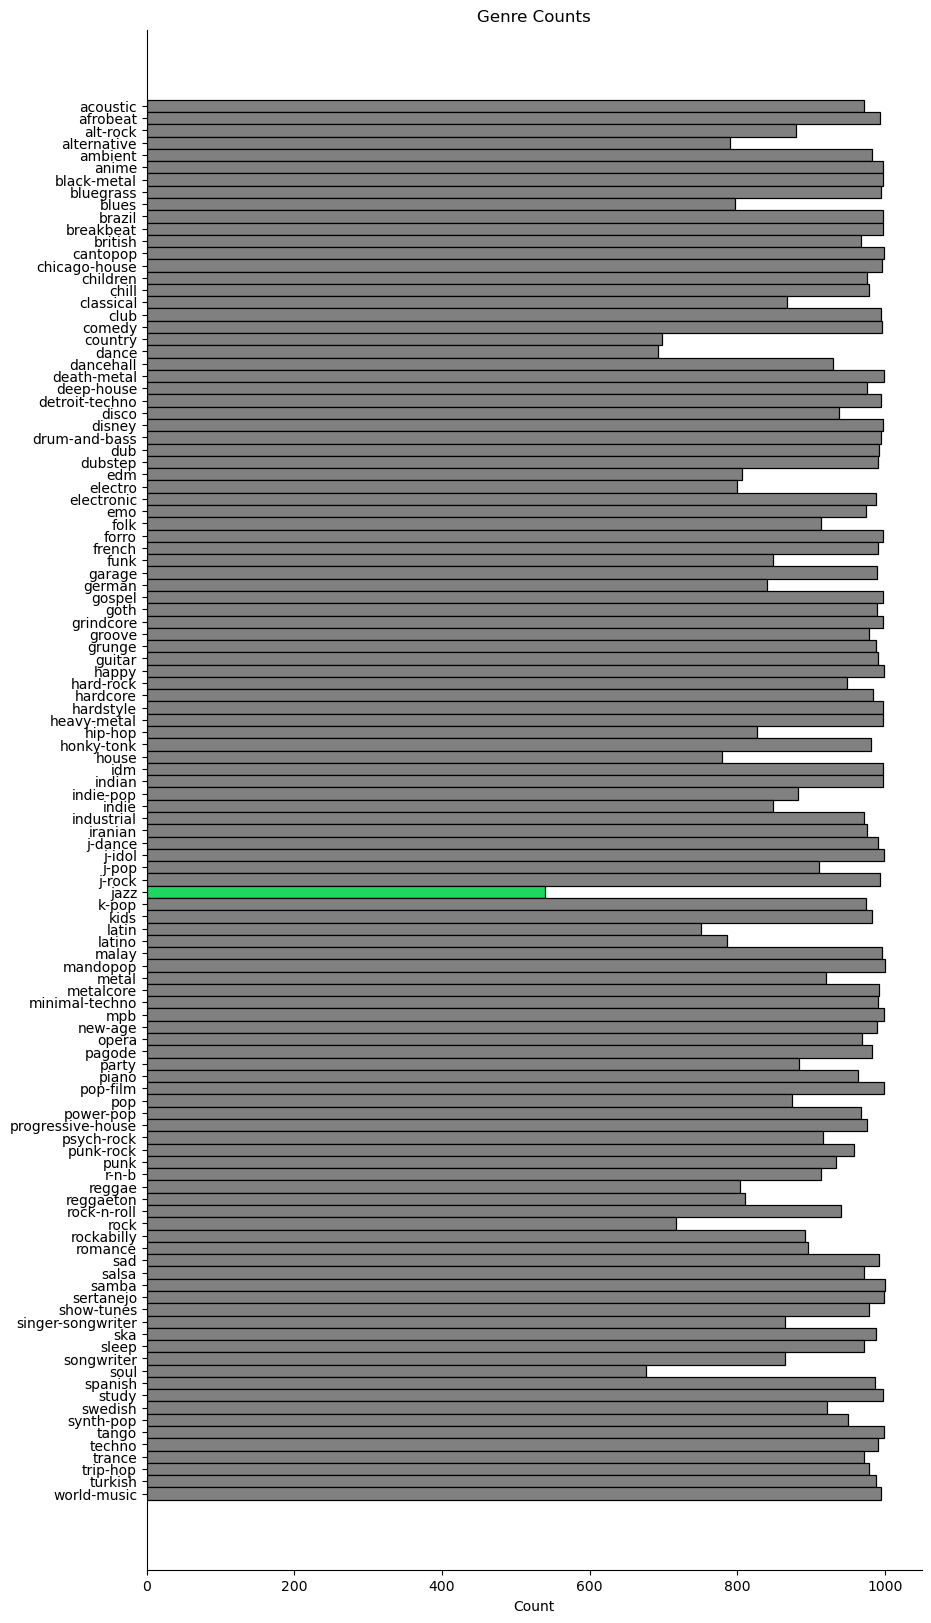

In [10]:
# Lets take a look at the distribution for genre to see how it changed after dropping duplicates

# Create the bar plot
fix, ax = plt.subplots(figsize=(10, 20))
sns.histplot(data=songAttributes, y='track_genre')

# Bar colors
for i in range(114):
    if i < 64 or i > 64:
        ax.patches[i].set_facecolor('grey')
    elif i == 64:
        ax.patches[i].set_facecolor('#1ED760')
        
# Y Label Colors
labels = ax.get_yticklabels()  # List of labels   
ax.set_title('Genre Counts')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('')

plt.savefig('Genre_Counts.png')
plt.show()


In [11]:
print(f"Minimum Genre Count: {songAttributes['track_genre'].value_counts().min()}")
print(f"Max Genre Count: {songAttributes['track_genre'].value_counts().max()}")
print(f"Genre Count Standard Deviation: {songAttributes['track_genre'].value_counts().std()}")
print(f"Genre Count Standard Deviation: {songAttributes['track_genre'].value_counts().median()}")

Minimum Genre Count: 540
Max Genre Count: 1000
Genre Count Standard Deviation: 87.26728674312562
Genre Count Standard Deviation: 979.0


In [12]:
len(songAttributes['track_genre'].unique())

114

A little weird to visualize due to the abundance of genres, but the counts don't vary too much. Lowest would be with Jazz at 540 tracks. 

In [13]:
# Lets take a look at the other variables - basic stats and whatnot
songAttributes.head()

artists                  track_name  popularity  \
0             Gen Hoshino                      Comedy          73   
1            Ben Woodward            Ghost - Acoustic          55   
2  Ingrid Michaelson;ZAYN              To Begin Again          57   
3            Kina Grannis  Can't Help Falling In Love          71   
4        Chord Overstreet                     Hold On          82   

   duration_ms  explicit  danceability  energy  key  loudness  mode  \
0       230666     False         0.676  0.4610    1    -6.746     0   
1       149610     False         0.420  0.1660    1   -17.235     1   
2       210826     False         0.438  0.3590    0    -9.734     1   
3       201933     False         0.266  0.0596    0   -18.515     1   
4       198853     False         0.618  0.4430    2    -9.681     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.1430        0.0322          0.000001    0.3580    0.715   87.917   
1       0.0763        0.9240          0.000006    0.1010    0.267   77.489   
2       0.0557        0.2100          0.000000    0.1170    0.120   76.332   
3       0.0363        0.9050          0.000071    0.1320    0.143  181.740   
4       0.0526        0.4690          0.000000    0.0829    0.167  119.949   

   time_signature track_genre  
0               4    acoustic  
1               4    acoustic  
2               4    acoustic  
3               3    acoustic  
4               4    acoustic

In [14]:
# Get Basic Stats for Each Variable
numericAttributes = songAttributes.iloc[:, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]
numericAttributes['duration_sec'] = songAttributes['duration_ms'] / 1000
numericAttributes.describe()  

popularity   duration_ms   danceability         energy  \
count  106949.000000  1.069490e+05  106949.000000  106949.000000   
mean       35.351663  2.299830e+05       0.565017       0.642839   
std        21.339355  1.085414e+05       0.173768       0.252461   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%        20.000000  1.754880e+05       0.454000       0.471000   
50%        37.000000  2.147610e+05       0.578000       0.686000   
75%        51.000000  2.642930e+05       0.693000       0.856000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  106949.000000  106949.000000  106949.000000  106949.000000   
mean        5.303575      -8.303681       0.634115       0.085466   
std         3.555843       5.065048       0.481680       0.107613   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.082000       0.000000       0.035900   
50%         5.000000      -7.056000       1.000000       0.049000   
75%         8.000000      -5.019000       1.000000       0.085000   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  106949.000000     106949.000000  106949.000000  106949.000000   
mean        0.313764          0.163337       0.215559       0.469296   
std         0.332777          0.315017       0.192968       0.259432   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.015400          0.000000       0.098200       0.254000   
50%         0.168000          0.000058       0.132000       0.456000   
75%         0.596000          0.068500       0.277000       0.678000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature   duration_sec  
count  106949.000000   106949.000000  106949.000000  
mean      122.373759        3.904263     229.982960  
std        29.943070        0.435489     108.541386  
min         0.000000        0.000000       0.000000  
25%        99.799000        4.000000     175.488000  
50%       122.080000        4.000000     214.761000  
75%       140.172000        4.000000     264.293000  
max       243.372000        5.000000    5237.295000

In [15]:
# Let's convert genre to numbers so that we can view it with the other variables 
genreNumerics = songAttributes.copy()

# Drop Artists and Track Name
genreNumerics = genreNumerics.drop(['artists', 'track_name'], axis=1)

# List of Genres to Iterate Through
genres = ['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'power-pop', 'progressive-house', 'psych-rock', 'punk-rock',
       'punk', 'r-n-b', 'reggae', 'reggaeton', 'rock-n-roll', 'rock',
       'rockabilly', 'romance', 'sad', 'salsa', 'samba', 'sertanejo',
       'show-tunes', 'singer-songwriter', 'ska', 'sleep', 'songwriter',
       'soul', 'spanish', 'study', 'swedish', 'synth-pop', 'tango',
       'techno', 'trance', 'trip-hop', 'turkish', 'world-music']

# Convert Genres to Numbers
genreCount = len(genres)
while genreCount > 0:
    
    for genre in genres:
        
        genreNumerics['track_genre'] = genreNumerics['track_genre'].replace(genre, genreCount) 
        
        # Update tickers
        genres.remove(genre)
        genreCount = len(genres)

In [16]:
genreNumerics.count()

popularity          106949
duration_ms         106949
explicit            106949
danceability        106949
energy              106949
key                 106949
loudness            106949
mode                106949
speechiness         106949
acousticness        106949
instrumentalness    106949
liveness            106949
valence             106949
tempo               106949
time_signature      106949
track_genre         106949
dtype: int64

### Lets check distributions for each variable using histograms/density plots and boxplots

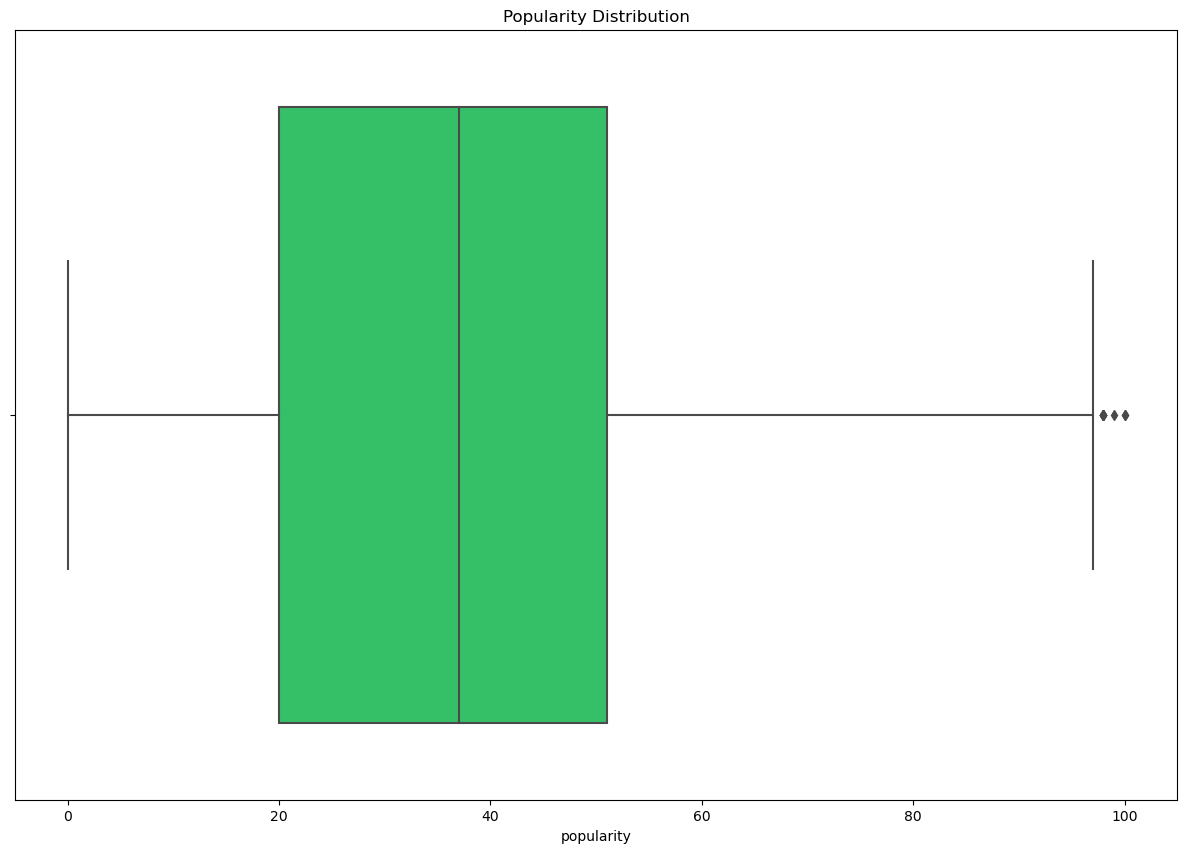

In [17]:
# Popularity 
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=genreNumerics, x='popularity', color='#1ED760')
ax.set_title("Popularity Distribution")
plt.savefig('Popularity_BoxPlot.png')
plt.show()

There is a little bit of skew and a lot of points at 0 popularity (or close) but otherwise it's relatively normal.
We have some outliers in here that we are going to remove using IQR

In [18]:
# Remove outliers from "popularity" using IQR

# Find IQR
Q1 = genreNumerics['popularity'].quantile(.25)
Q3 = genreNumerics['popularity'].quantile(.75)
IQR = Q3 - Q1

# Remove outliers
genreNumerics = genreNumerics[(genreNumerics['popularity'] >= Q1 - 1.5 * IQR) & 
                              (genreNumerics['popularity'] <= Q3 + 1.5 * IQR)]

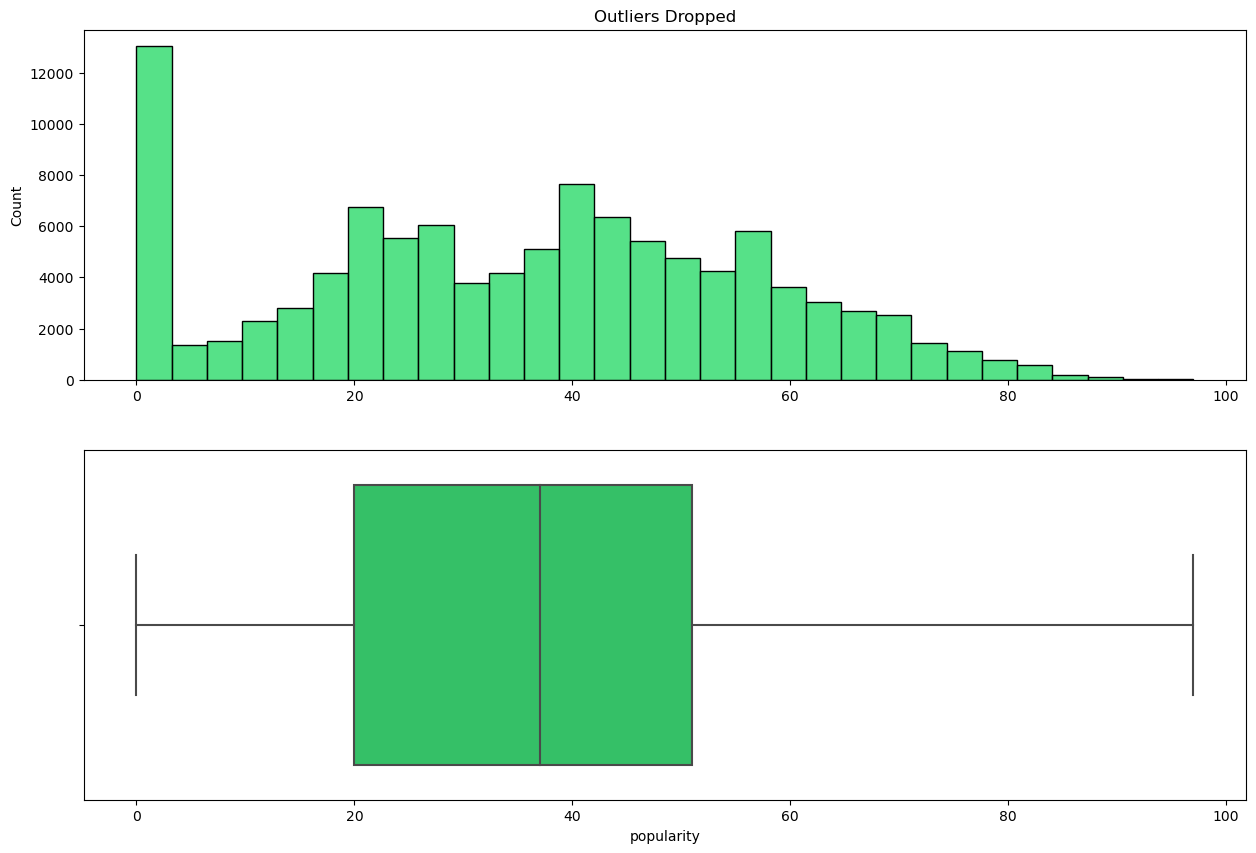

In [19]:
# Check Again
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 10))
sns.histplot(data=genreNumerics['popularity'], bins=30, color='#1ED760', ax=ax1)
sns.boxplot(data=genreNumerics, x='popularity', color='#1ED760', ax=ax2)
ax1.set_title("Outliers Dropped")
ax1.set_xlabel('')
plt.savefig('Popularity_OutliersDropped.png')
plt.show()

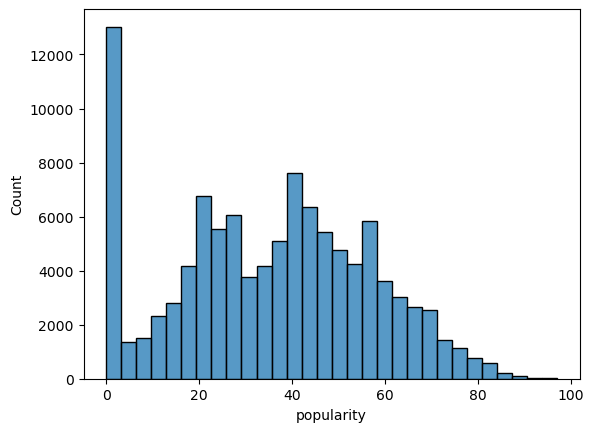

In [20]:
sns.histplot(data=genreNumerics['popularity'], bins=30)
plt.show()

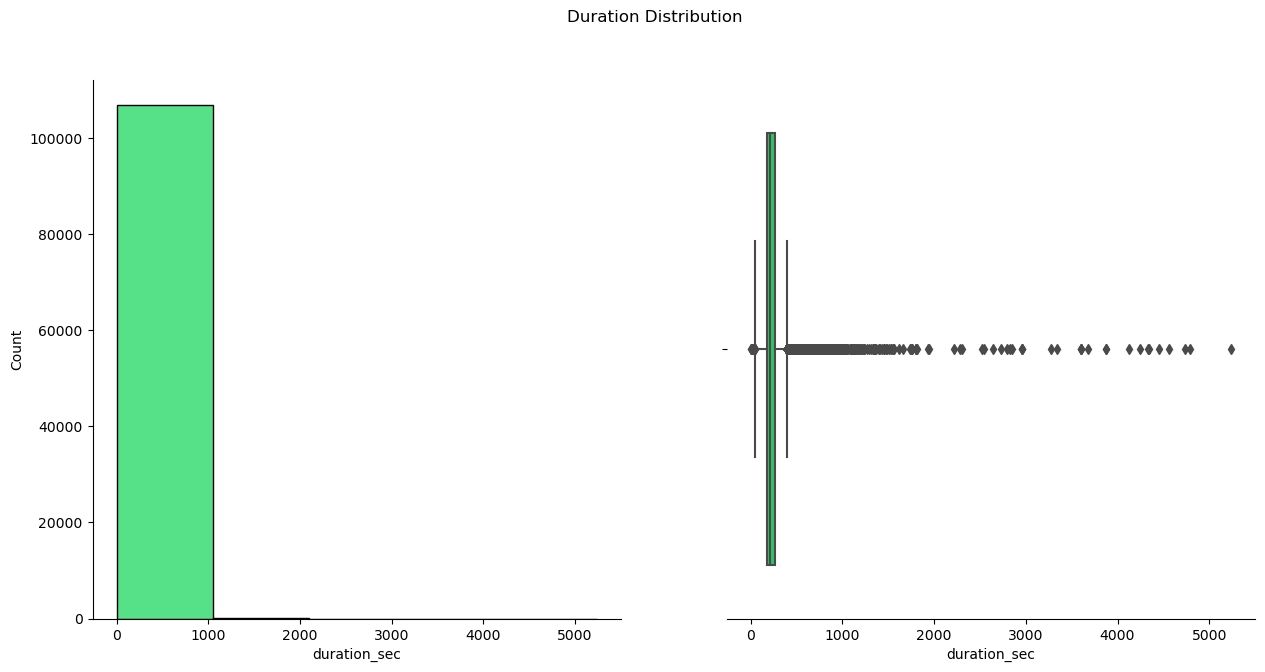

In [21]:
# Duration

# Replacing converted duration from ms to sec from previous df
genreNumerics['duration_sec'] = numericAttributes['duration_sec']
genreNumerics = genreNumerics.drop('duration_ms', axis=1)

# Plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=genreNumerics['duration_sec'], bins=5, color='#1ED760', ax=ax1)
sns.boxplot(data=genreNumerics, x='duration_sec', color='#1ED760', ax=ax2)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
fig.suptitle("Duration Distribution")
plt.savefig('Duration_Distribution.png')
plt.show()

A LOT of outliers. Lets remove them to see if we can get a better look at normality

In [22]:
# Remove outliers from "duration_sec" using IQR

# Find IQR
Q1 = genreNumerics['duration_sec'].quantile(.25)
Q3 = genreNumerics['duration_sec'].quantile(.75)
IQR = Q3 - Q1

# Remove outliers
genreNumerics = genreNumerics[(genreNumerics['duration_sec'] >= Q1 - 1.5 * IQR) & 
                              (genreNumerics['duration_sec'] <= Q3 + 1.5 * IQR)]

[]

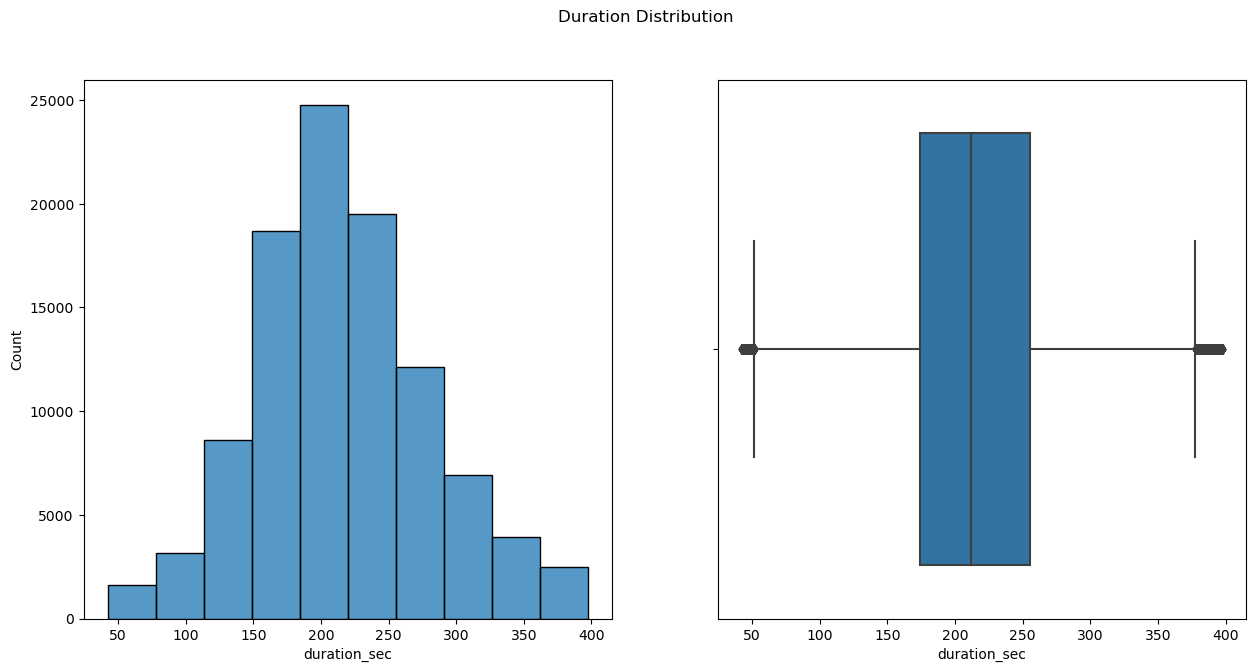

In [23]:
# Plot again
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=genreNumerics['duration_sec'], bins=10, ax=ax1)
sns.boxplot(data=genreNumerics, x='duration_sec', ax=ax2)
fig.suptitle("Duration Distribution")
plt.plot()

Now we can see normality a lot clearer - very normal. We still have some outliers lingering though. Let's take these out ourselves. 

<AxesSubplot:xlabel='duration_sec'>

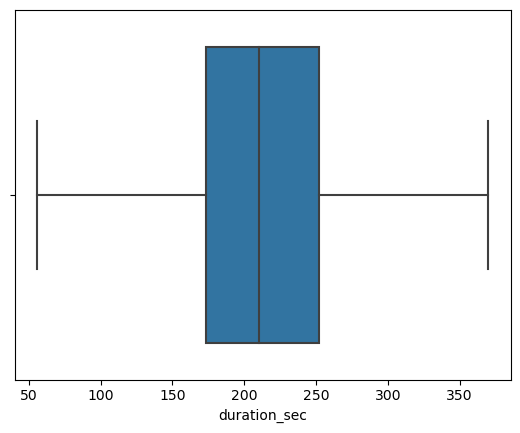

In [24]:
# Remove remaining outliers from "duration_sec" 

# Remove outliers
genreNumerics = genreNumerics[(genreNumerics['duration_sec'] >= 56) &  
                              (genreNumerics['duration_sec'] <= 370)]  
sns.boxplot(data=genreNumerics, x='duration_sec')

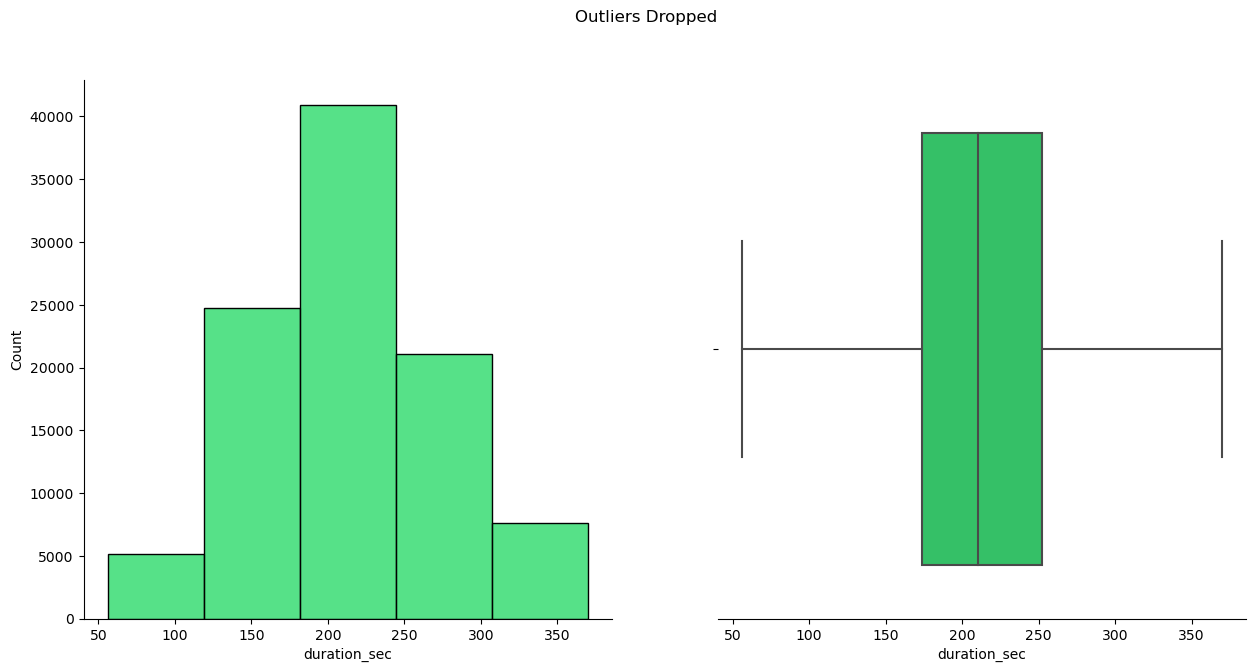

In [25]:
# Plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=genreNumerics['duration_sec'], bins=5, color='#1ED760', ax=ax1)
sns.boxplot(data=genreNumerics, x='duration_sec', color='#1ED760', ax=ax2)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
fig.suptitle("Outliers Dropped")
plt.savefig('Duration_Outliers_Dropped.png')
plt.show()

[]

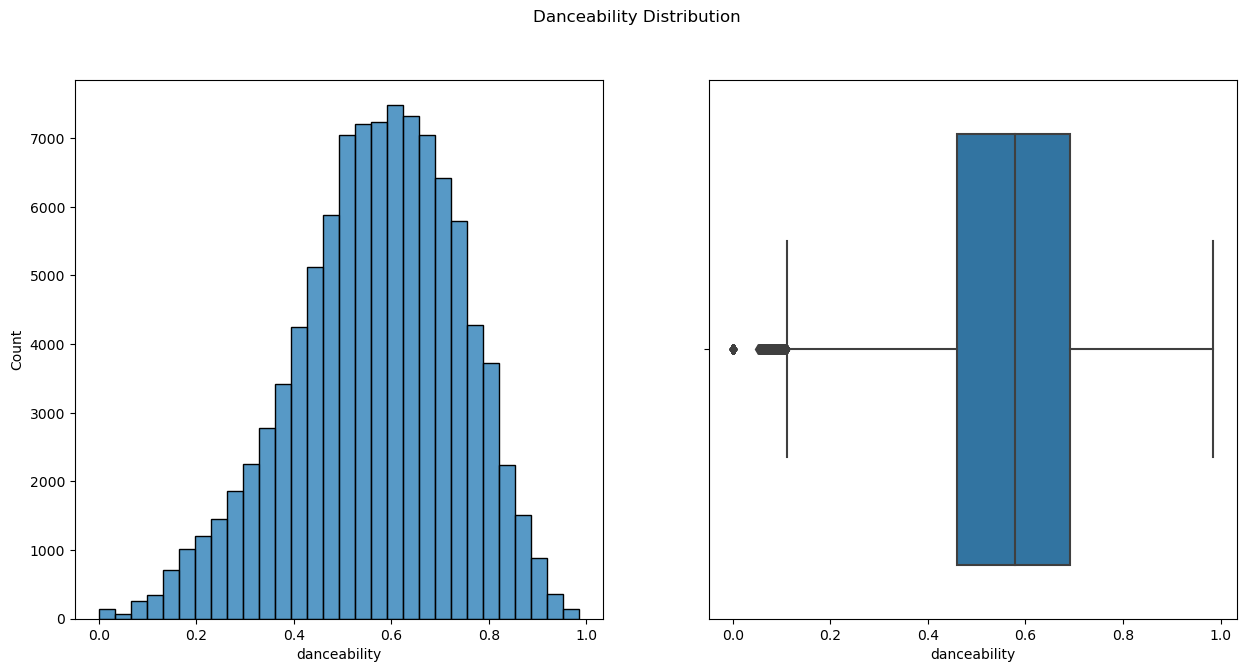

In [26]:
# Danceability
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=genreNumerics['danceability'], bins=30, ax=ax1)
sns.boxplot(data=genreNumerics, x='danceability', ax=ax2)
fig.suptitle("Danceability Distribution")
plt.plot()

Relatively normal, lets see if removing those outliers helps. 

In [27]:
# Remove outliers from "duration_sec" using IQR

# Find IQR
Q1 = genreNumerics['danceability'].quantile(.25)
Q3 = genreNumerics['danceability'].quantile(.75)
IQR = Q3 - Q1

# Remove outliers
genreNumerics = genreNumerics[(genreNumerics['danceability'] >= Q1 - 1.4 * IQR) & # 1.4 because 1.5 didnt get rid
                              (genreNumerics['danceability'] <= Q3 + 1.4 * IQR)]  # of every outlier 

[]

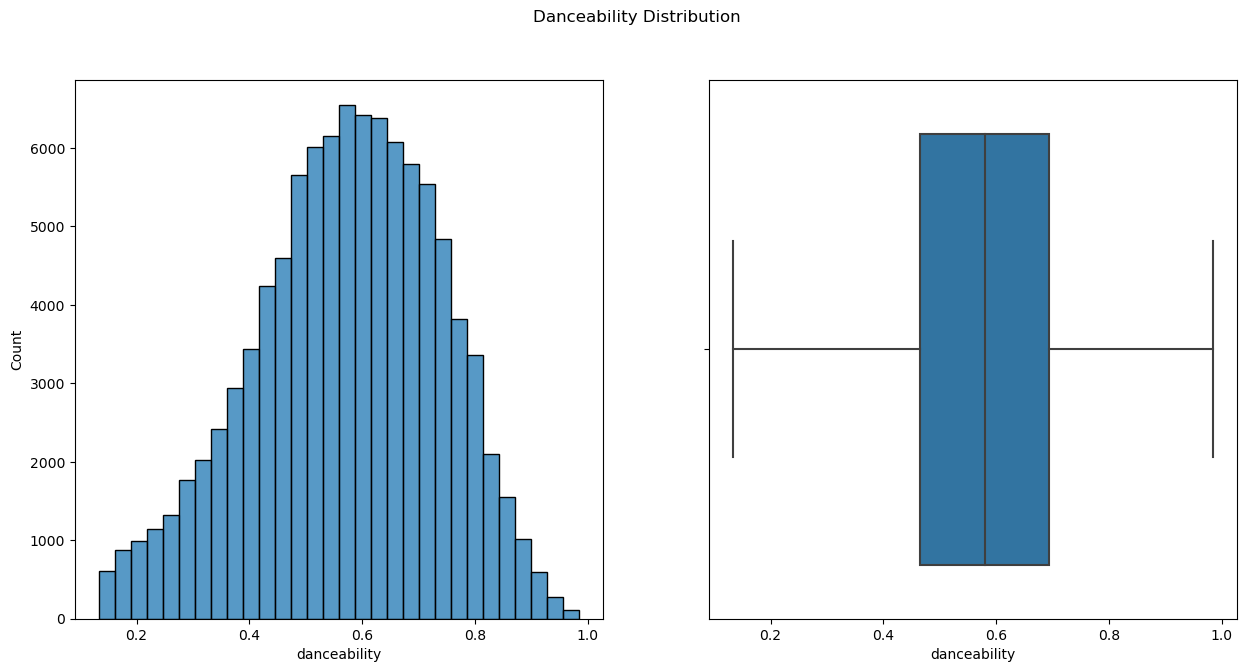

In [28]:
# Plot again
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=genreNumerics['danceability'], bins=30, ax=ax1)
sns.boxplot(data=genreNumerics, x='danceability', ax=ax2)
fig.suptitle("Danceability Distribution")
plt.plot()

[]

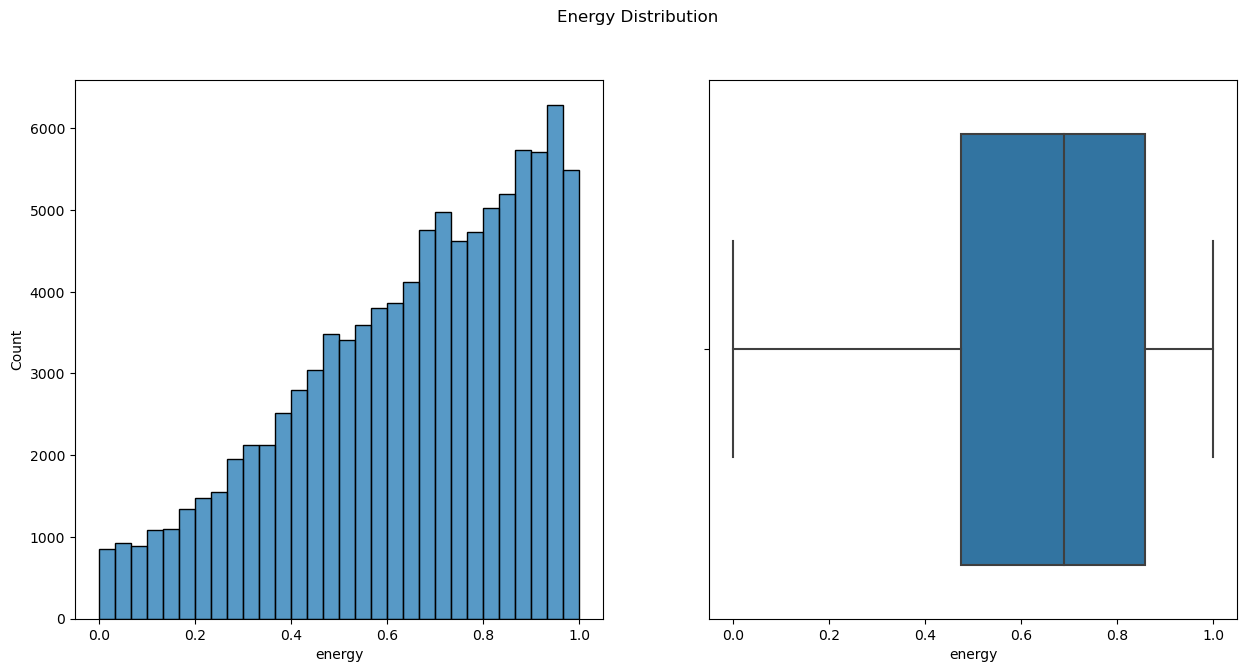

In [29]:
# Energy
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=genreNumerics['energy'], bins=30, ax=ax1)
sns.boxplot(data=genreNumerics, x='energy', ax=ax2)
fig.suptitle("Energy Distribution")
plt.plot()

No outliers but there is some left skew - might need to be normalized

[]

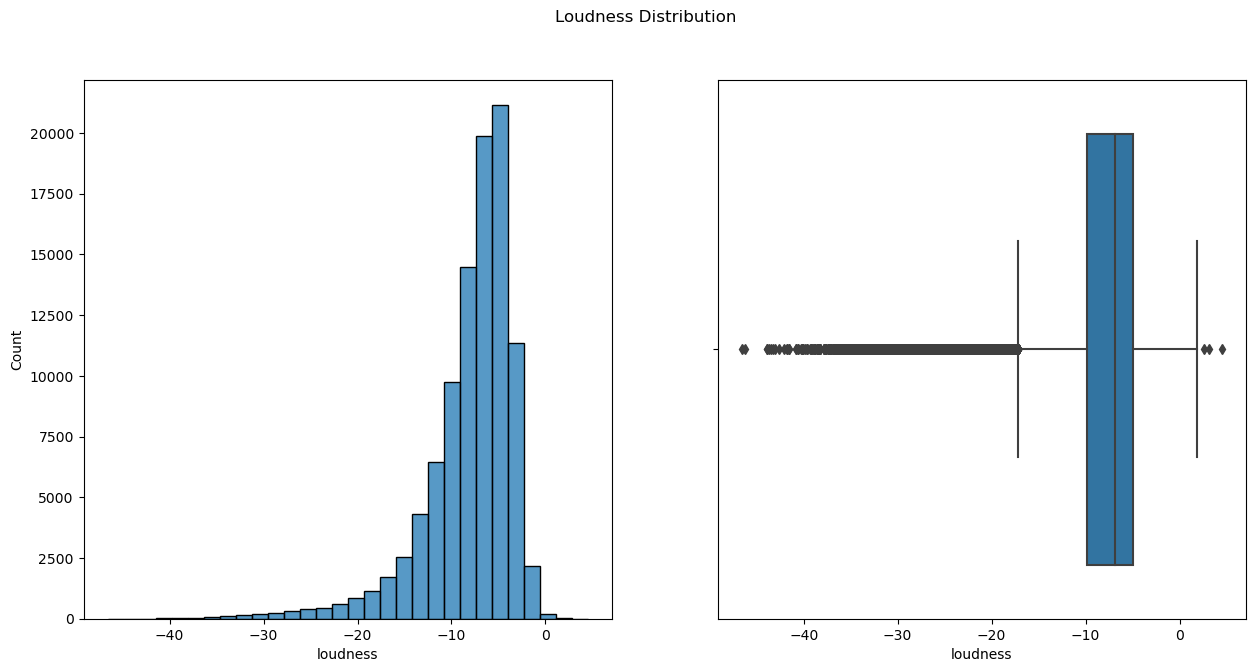

In [30]:
# Loudness
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=genreNumerics['loudness'], bins=30, ax=ax1)
sns.boxplot(data=genreNumerics, x='loudness', ax=ax2)
fig.suptitle("Loudness Distribution")
plt.plot()

[]

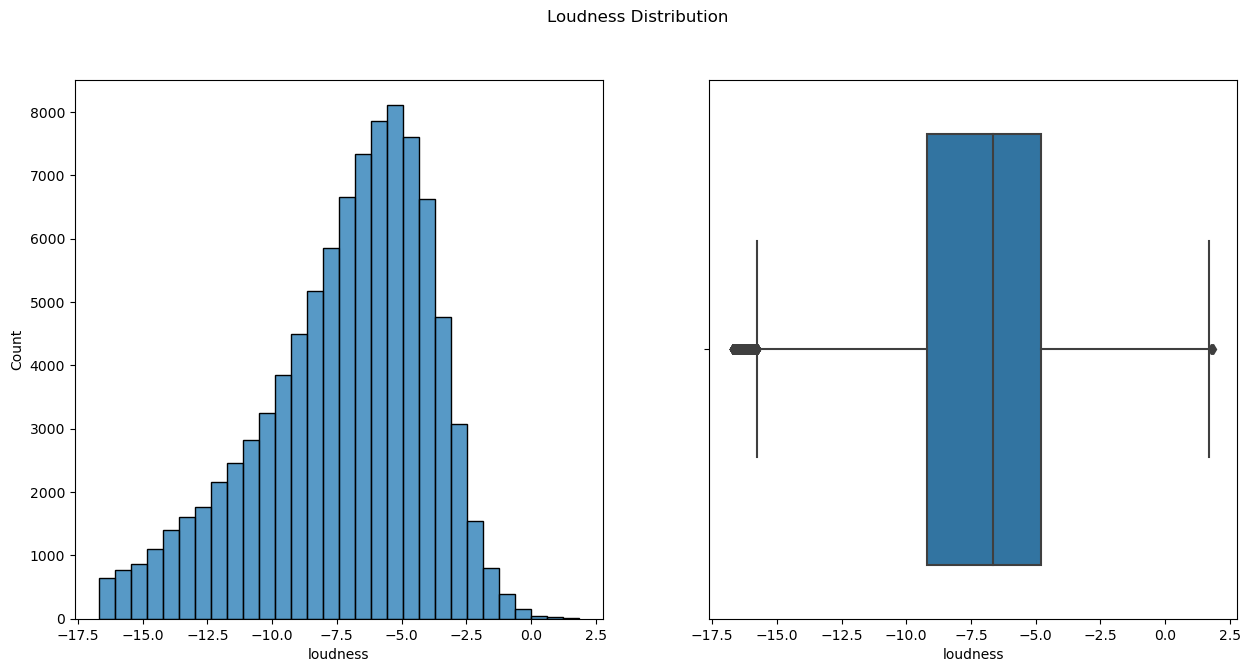

In [31]:
# Remove outliers from "loudness" using IQR

# Find IQR
Q1 = genreNumerics['loudness'].quantile(.25)
Q3 = genreNumerics['loudness'].quantile(.75)
IQR = Q3 - Q1

# Remove outliers
genreNumerics = genreNumerics[(genreNumerics['loudness'] >= Q1 - 1.4 * IQR) & 
                              (genreNumerics['loudness'] <= Q3 + 1.4 * IQR)]  

# Plot again
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=genreNumerics['loudness'], bins=30, ax=ax1)
sns.boxplot(data=genreNumerics, x='loudness', ax=ax2)
fig.suptitle("Loudness Distribution")
plt.plot()

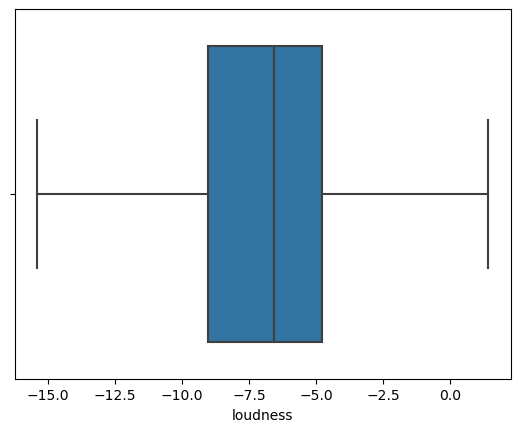

In [32]:
# Remove remaining outliers
genreNumerics = genreNumerics[(genreNumerics['loudness'] >= (-15.4)) & 
                              (genreNumerics['loudness'] <= 1.6)]  

# Plot again
sns.boxplot(data=genreNumerics, x='loudness')
plt.show()

[]

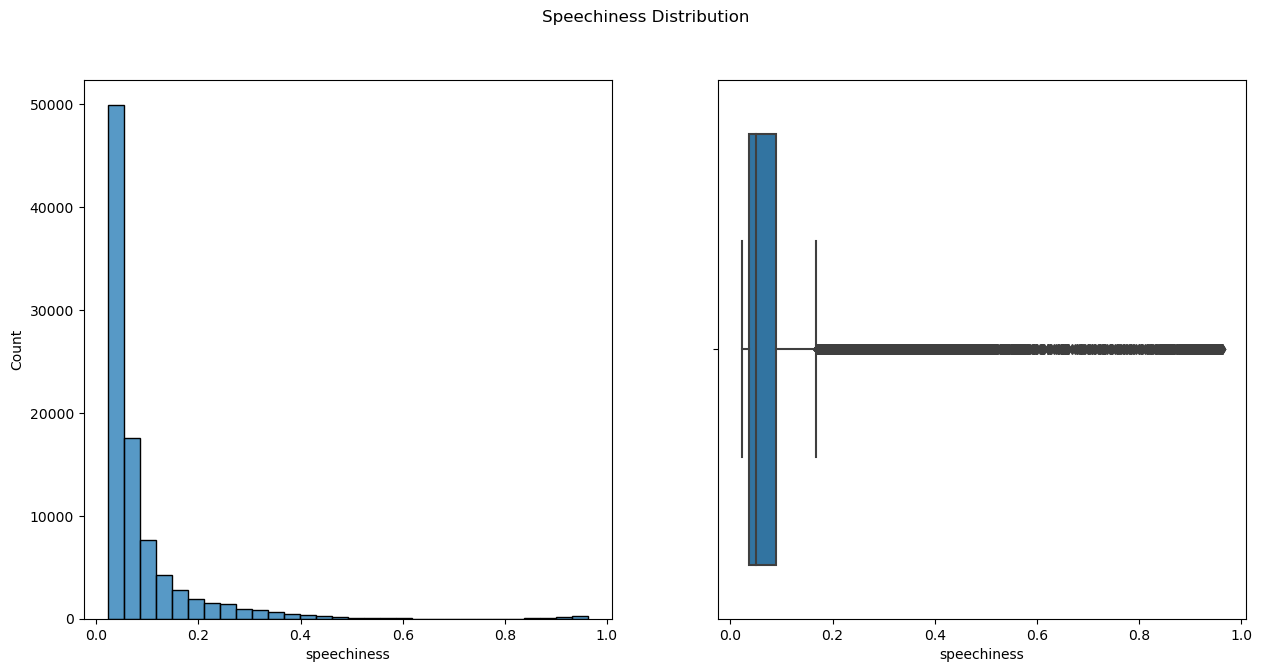

In [33]:
# Speechiness
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=genreNumerics['speechiness'], bins=30, ax=ax1)
sns.boxplot(data=genreNumerics, x='speechiness', ax=ax2)
fig.suptitle("Speechiness Distribution")
plt.plot()

[]

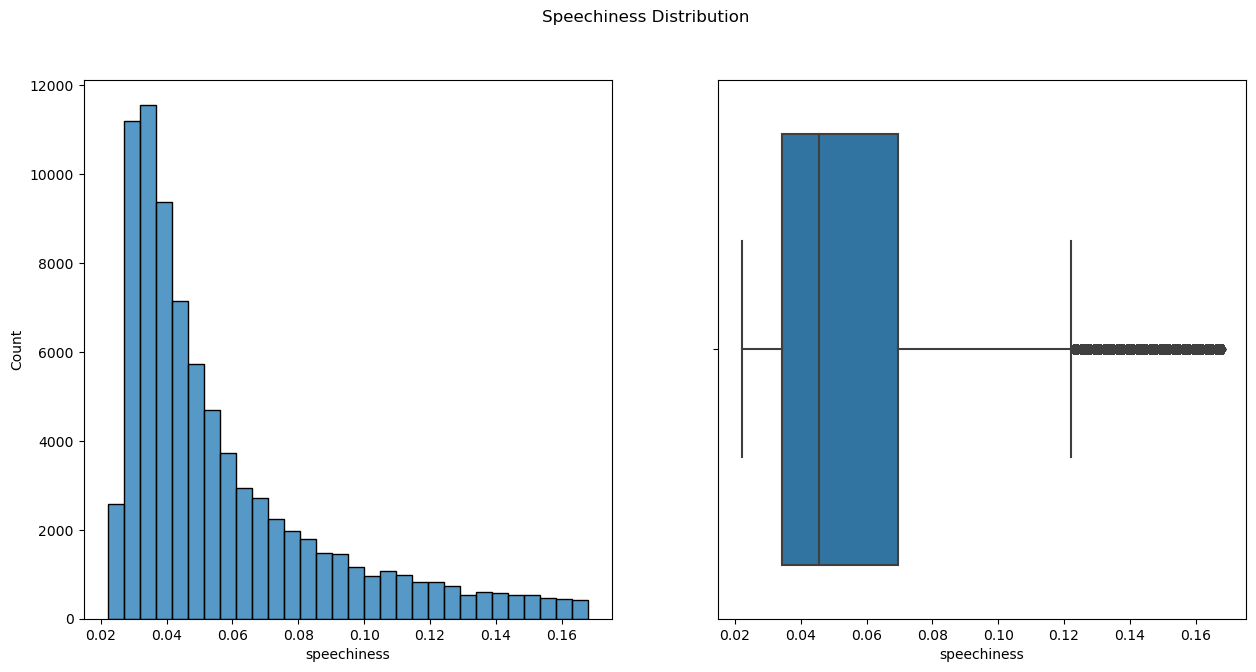

In [34]:
# Remove outliers from "speechiness" using IQR

# Find IQR
Q1 = genreNumerics['speechiness'].quantile(.25)
Q3 = genreNumerics['speechiness'].quantile(.75)
IQR = Q3 - Q1

# Remove outliers
genreNumerics = genreNumerics[(genreNumerics['speechiness'] >= Q1 - 1.5 * IQR) & 
                              (genreNumerics['speechiness'] <= Q3 + 1.5 * IQR)] 

# Plot again
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=genreNumerics['speechiness'], bins=30, ax=ax1)
sns.boxplot(data=genreNumerics, x='speechiness', ax=ax2)
fig.suptitle("Speechiness Distribution")
plt.plot()

A lot of outliers and a good amount of right skew - might need to be normalized.

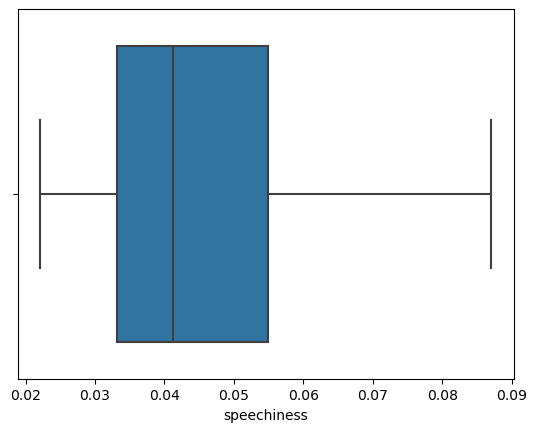

In [35]:
# Remove remaining outliers
genreNumerics = genreNumerics[genreNumerics['speechiness'] <= .087]  

# Plot again
sns.boxplot(data=genreNumerics, x='speechiness')
plt.show()

[]

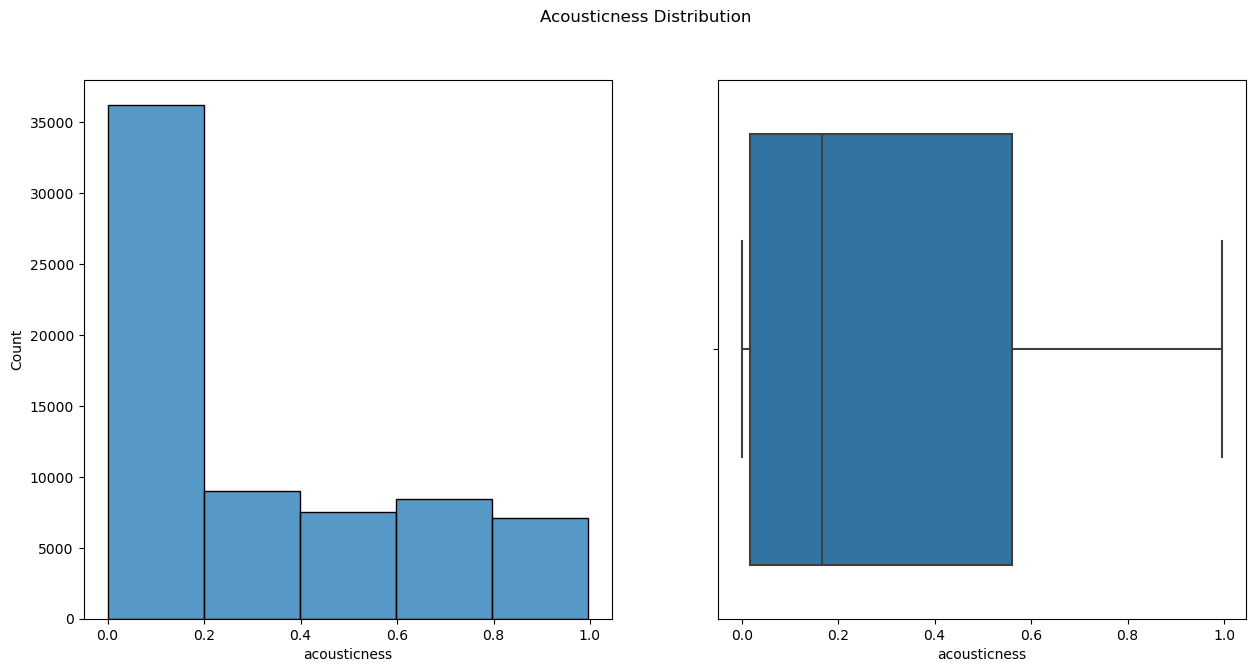

In [36]:
# Acousticness
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=genreNumerics['acousticness'], bins=5, ax=ax1)
sns.boxplot(data=genreNumerics, x='acousticness', ax=ax2)
fig.suptitle("Acousticness Distribution")
plt.plot()

Right skew, no outliers. 

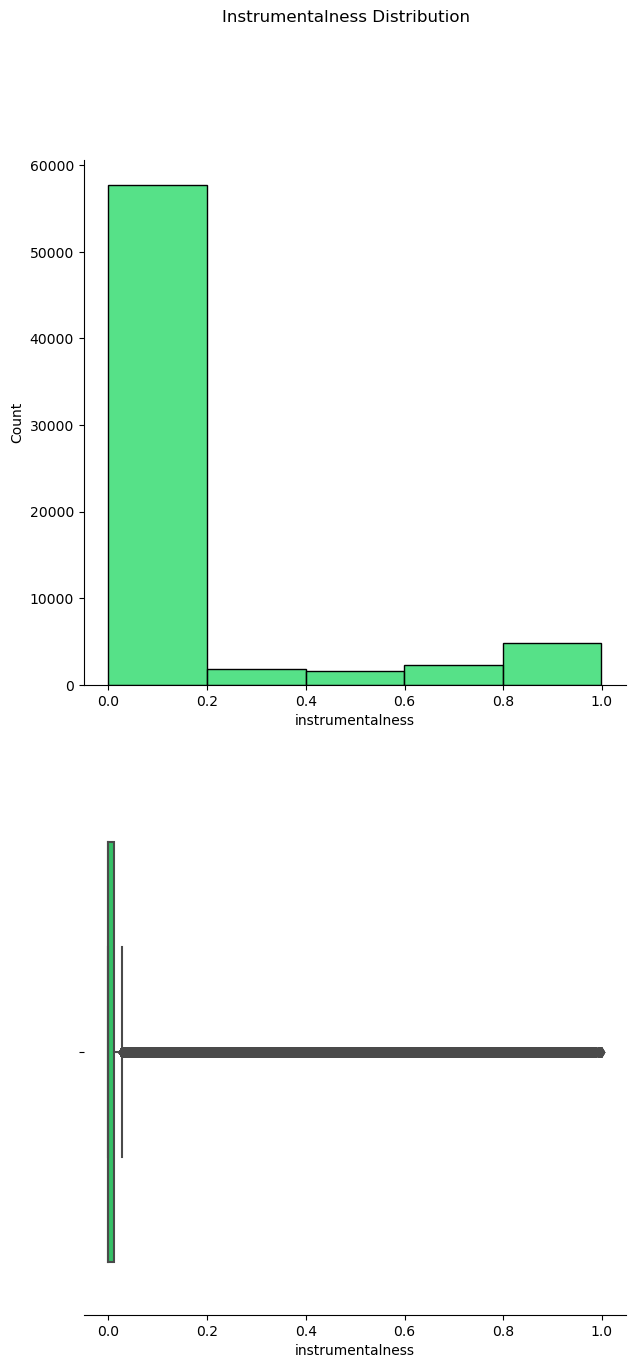

In [37]:
# Instrumentalness
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7, 15))
sns.histplot(data=genreNumerics['instrumentalness'], color='#1ED760', bins=5, ax=ax1)
sns.boxplot(data=genreNumerics, x='instrumentalness', color='#1ED760', ax=ax2)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
fig.suptitle("Instrumentalness Distribution")
plt.savefig("Instrumentalness_Distribution.png")
plt.show()

Instrumentalness measures how much how many vocals are detected throughout the track. The closer it is to 1, the greater the likelyhood that the track has no vocals. Therefore, it may be worth it to not remove these outliers since we are trying to cluster music. Since we are not removing outliers here, we are going to refrain from normalzing this for right now until proven otherwise.

[]

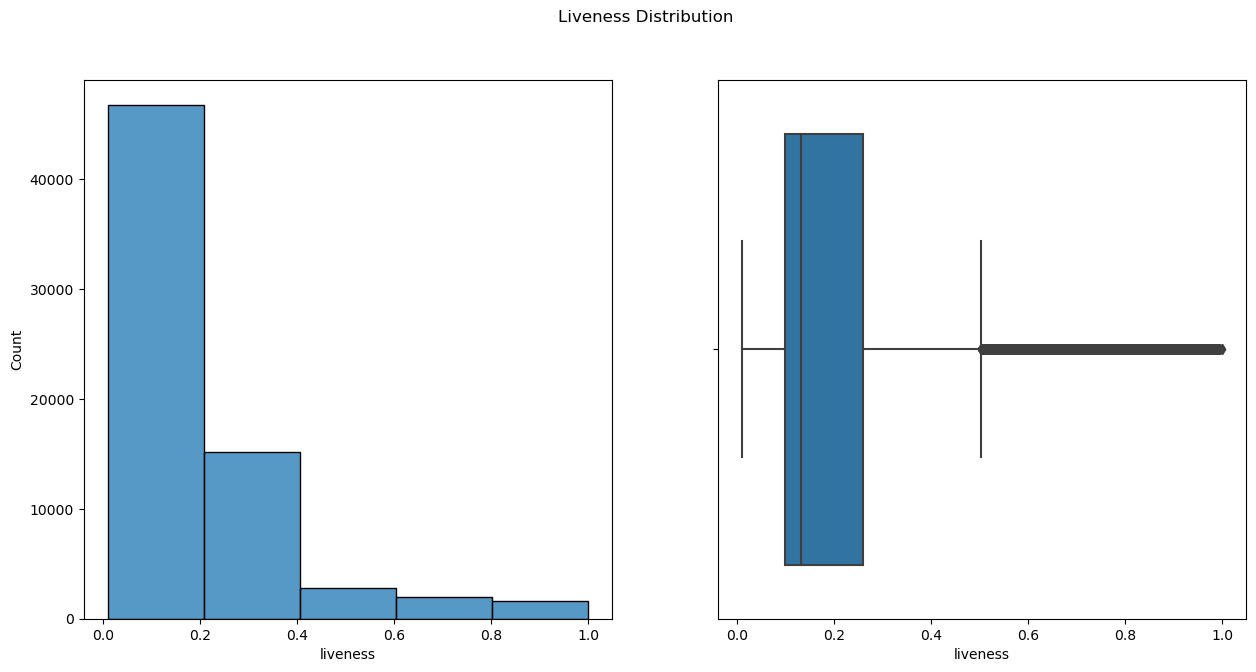

In [38]:
# Liveness
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=genreNumerics['liveness'], bins=5, ax=ax1)
sns.boxplot(data=genreNumerics, x='liveness', ax=ax2)
fig.suptitle("Liveness Distribution")
plt.plot()

Liveness is measuring how much of an audience presence is in the track. We can remove these outliers.

[]

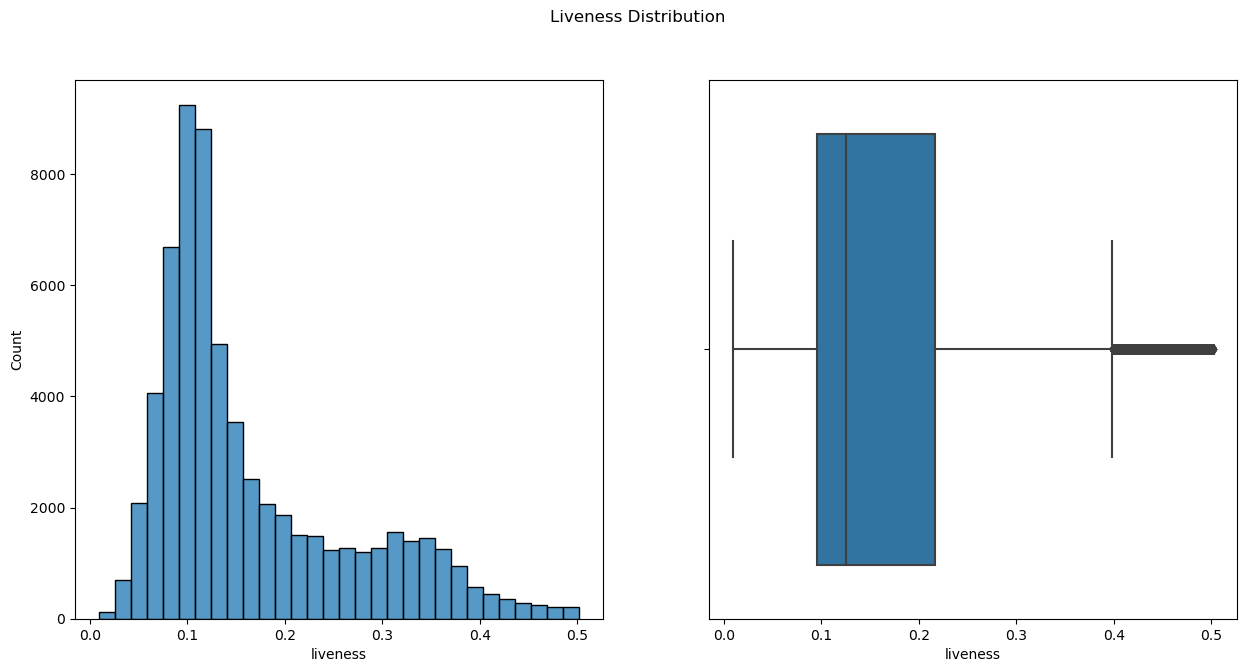

In [39]:
# Remove outliers from "liveness" using IQR

# Find IQR
Q1 = genreNumerics['liveness'].quantile(.25)
Q3 = genreNumerics['liveness'].quantile(.75)
IQR = Q3 - Q1

# Remove outliers
genreNumerics = genreNumerics[(genreNumerics['liveness'] >= Q1 - 1.5 * IQR) & 
                              (genreNumerics['liveness'] <= Q3 + 1.5 * IQR)] 

# Plot again
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=genreNumerics['liveness'], bins=30, ax=ax1)
sns.boxplot(data=genreNumerics, x='liveness', ax=ax2)
fig.suptitle("Liveness Distribution")
plt.plot()

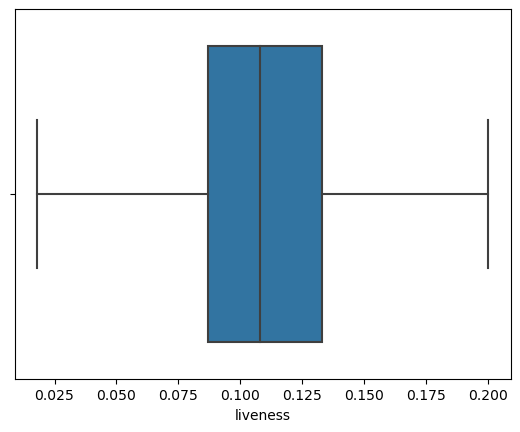

In [40]:
# Remove remaining outliers
genreNumerics = genreNumerics[(genreNumerics['liveness'] >= .018)
                              & (genreNumerics['liveness'] <= .2)]  

# Plot again
sns.boxplot(data=genreNumerics, x='liveness')
plt.show()

[]

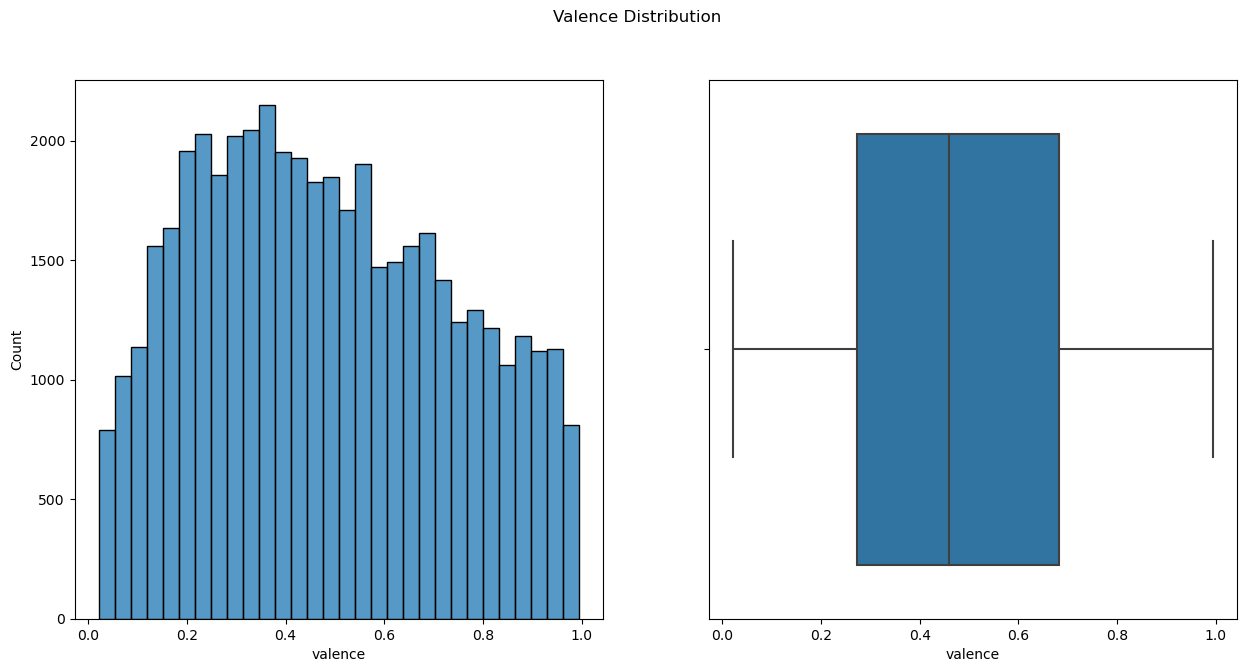

In [41]:
# Valence
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=genreNumerics['valence'], bins=30, ax=ax1)
sns.boxplot(data=genreNumerics, x='valence', ax=ax2)
fig.suptitle("Valence Distribution")
plt.plot()

[]

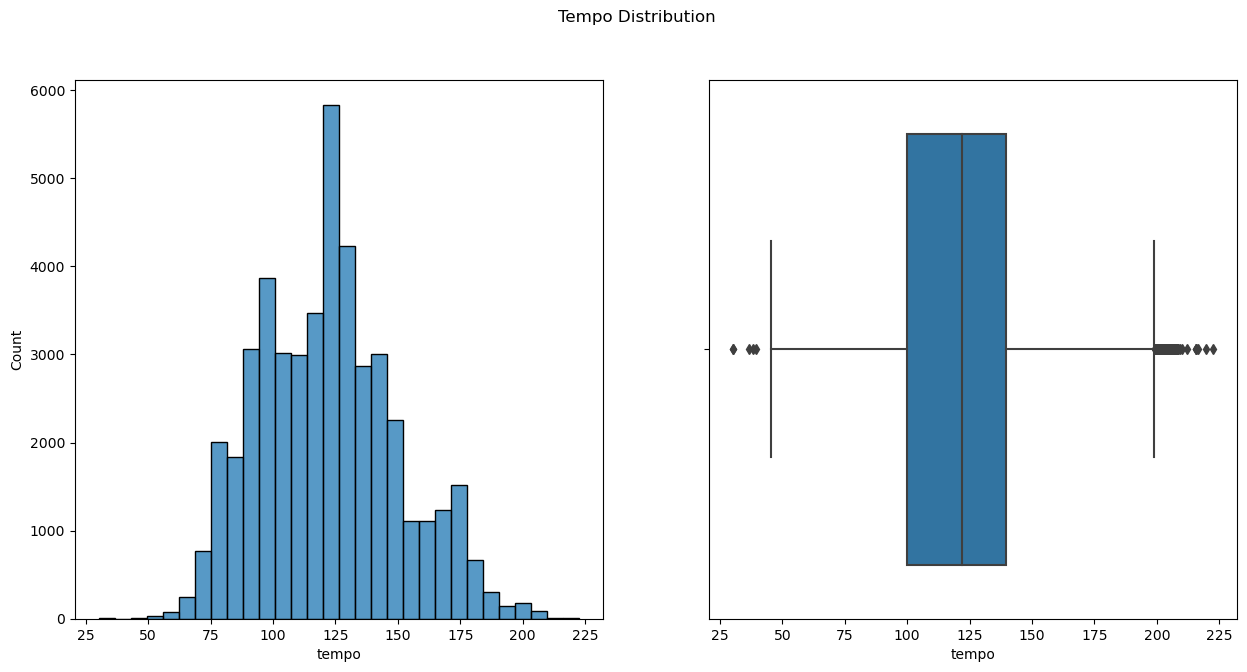

In [42]:
# Tempo
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=genreNumerics['tempo'], bins=30, ax=ax1)
sns.boxplot(data=genreNumerics, x='tempo', ax=ax2)
fig.suptitle("Tempo Distribution")
plt.plot()

[]

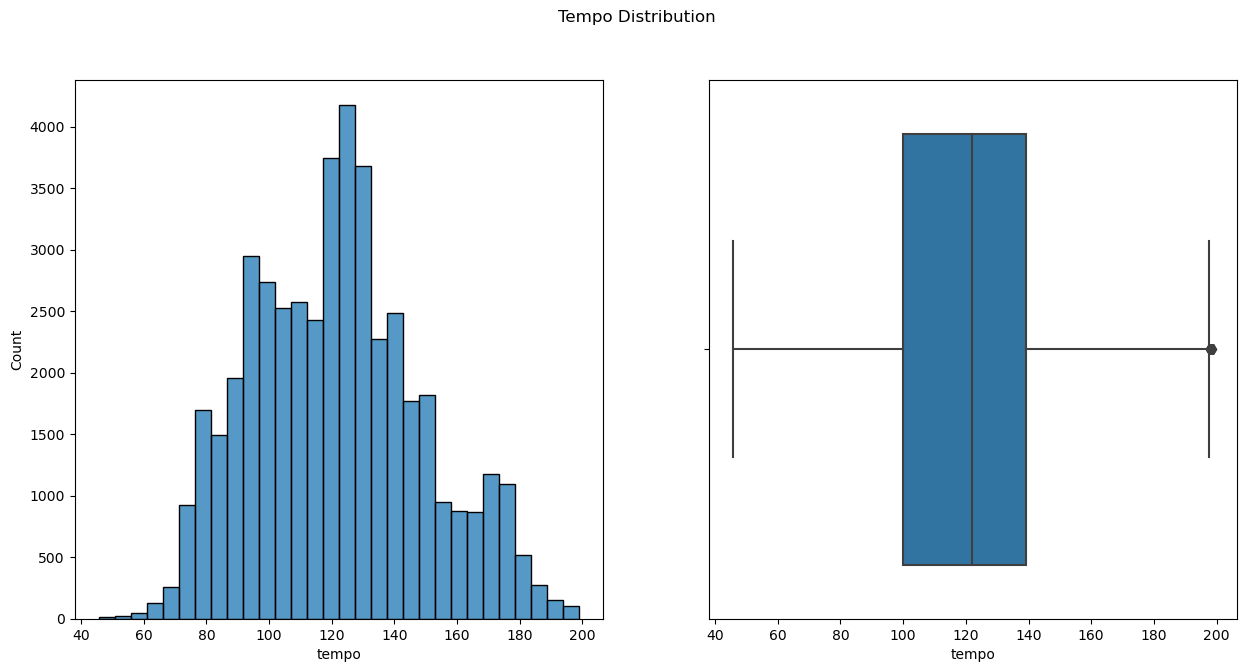

In [43]:
# Remove outliers from "tempo" using IQR

# Find IQR
Q1 = genreNumerics['tempo'].quantile(.25)
Q3 = genreNumerics['tempo'].quantile(.75)
IQR = Q3 - Q1

# Remove outliers
genreNumerics = genreNumerics[(genreNumerics['tempo'] >= Q1 - 1.5 * IQR) & 
                              (genreNumerics['tempo'] <= Q3 + 1.5 * IQR)] 

# Plot again
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=genreNumerics['tempo'], bins=30, ax=ax1)
sns.boxplot(data=genreNumerics, x='tempo', ax=ax2)
fig.suptitle("Tempo Distribution")
plt.plot()

Tempo is pretty normal, going to manually remove those outliers there

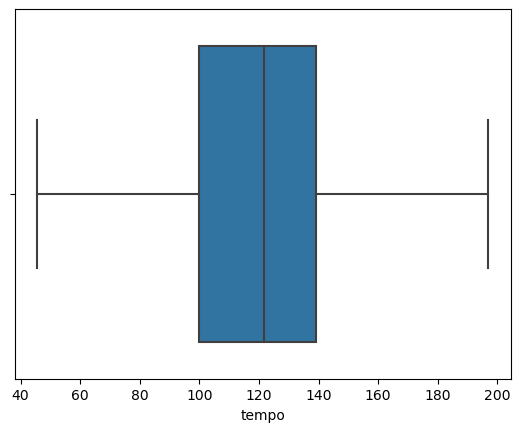

In [44]:
# Remove remaining outliers
genreNumerics = genreNumerics[genreNumerics['tempo'] <= 197]  

# Plot again
sns.boxplot(data=genreNumerics, x='tempo')
plt.show()

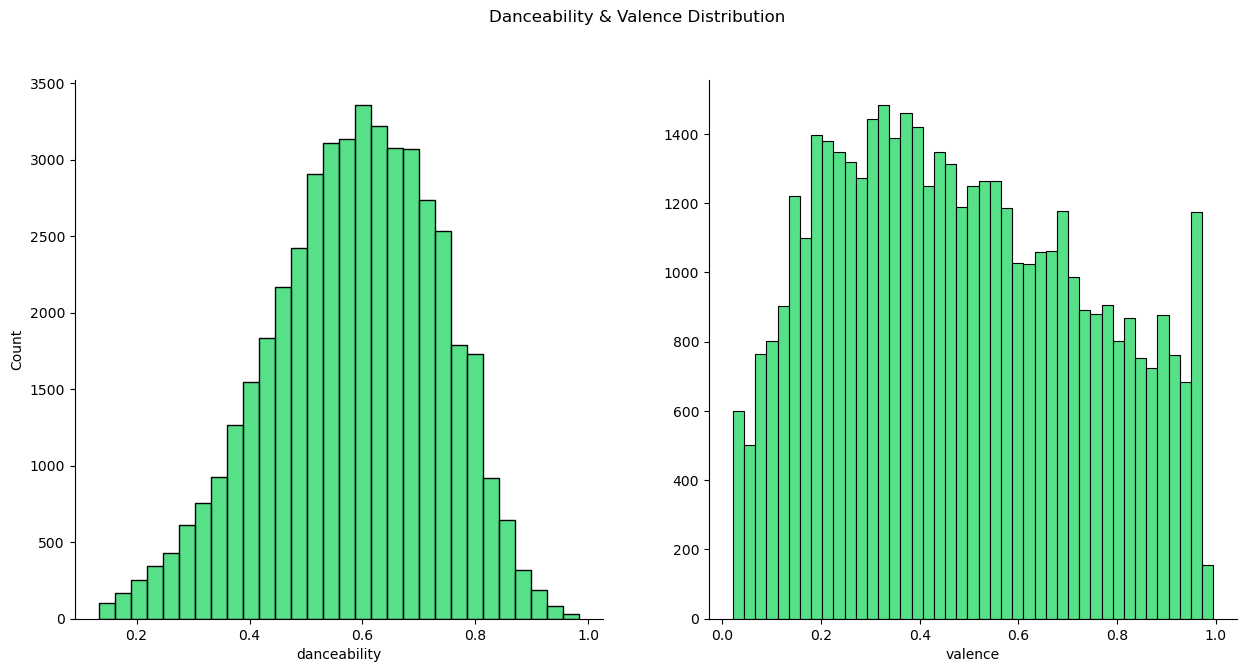

In [45]:
# Plot again
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))
sns.histplot(data=genreNumerics, x='danceability', color='#1ED760', bins=30, ax=ax1)
sns.histplot(data=genreNumerics, x='valence', color='#1ED760', ax=ax2)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylabel('')
fig.suptitle("Danceability & Valence Distribution")
plt.savefig('Danceability_Valence_Distribution.png')
plt.show()

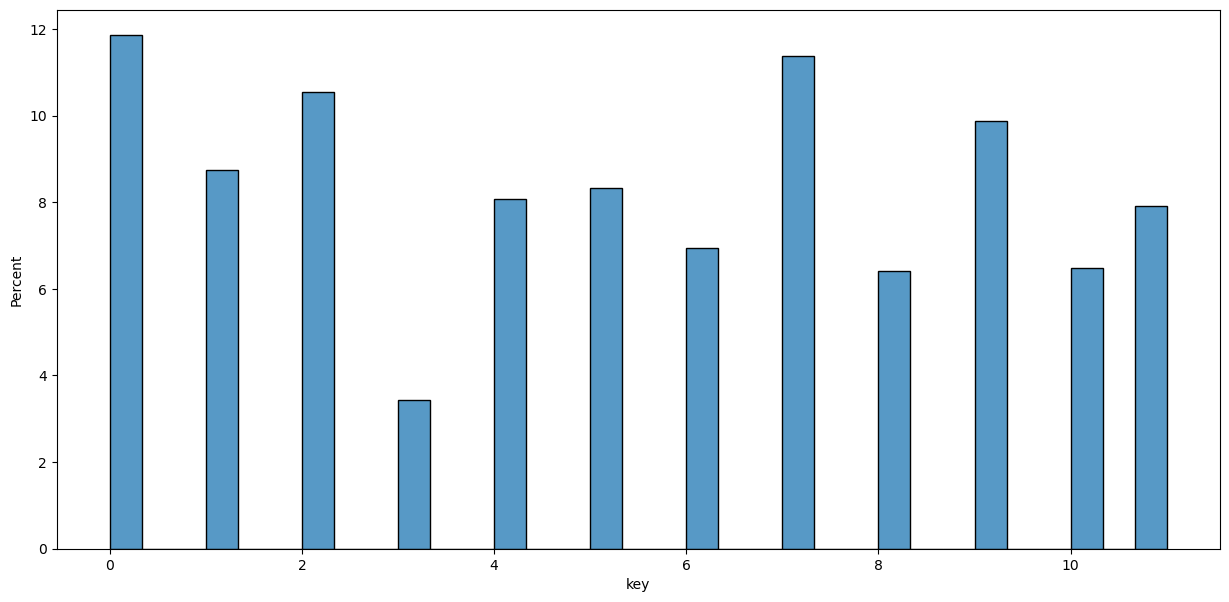

In [46]:
# Get Distributions for Categorical Variables ("explicit", "key", "mode", "time_signature")
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(data=genreNumerics, x="key", stat='percent')
plt.show()

Key refers to the key the track is in: 

C - 0 <br>
C#/Db - 1 <br>
D - 2 <br>
D#/Eb - 3 <br>
E - 4 <br>
F - 5 <br>
F#/Gb - 6 <br>
G - 7 <br>
G♯/A♭ - 8 <br>
A - 9 <br>
A♯/B♭ - 10 <br>
B - 11 <br>

Percentages vary across catergories. About 12% of the data is in key C. Followed by G and then D. D#/Eb have the least amount of data points at around 3%. 

In [47]:
# 'Explicit' Percentages
(genreNumerics['explicit'].value_counts() / genreNumerics['explicit'].value_counts().sum()) * 100

False    94.907053
True      5.092947
Name: explicit, dtype: float64

In [48]:
# 'Mode' Percentages
(genreNumerics['mode'].value_counts() / genreNumerics['mode'].value_counts().sum()) * 100

1    65.242714
0    34.757286
Name: mode, dtype: float64

Mode represents modality of the track. 1 is major and 0 is minor.

In [49]:
# 'Time_Signature' Percentages
(genreNumerics['time_signature'].value_counts() / genreNumerics['time_signature'].value_counts().sum()) * 100

4    91.204484
3     7.275952
5     0.921810
1     0.588995
0     0.008758
Name: time_signature, dtype: float64

This variable is supposed to represent an estimated time signature. A time signature measures how many beats are in one bar. According to the codebook in Kaggle, the values are supposed to be from 3 - 7 representing time signatures 3/4 - 7/4. Assuming all of this and assuming the values were recoded in ascending order, this should be our key here:

0 -> 3 -> 3/4 <br>
1 -> 4 -> 4/4 <br>
2 -> 5 -> 5/4 <br>
3 -> 6 -> 6/8 <br>
4 -> 7 -> 7/4 <br>

Therefore, about 91% of the songs are in 7/4 and about 7% are in 6/8. 7/4 time signatures are known for creating rhythmic pieces and 6/8 is also another popular time signature used in a lot of different genres. 

In [50]:
genreNumerics.head()

popularity  explicit  danceability  energy  key  loudness  mode  \
2          57     False         0.438   0.359    0    -9.734     1   
4          82     False         0.618   0.443    2    -9.681     1   
6          74     False         0.407   0.147    2    -8.822     1   
7          80     False         0.703   0.444   11    -9.331     1   
8          74     False         0.625   0.414    0    -8.700     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
2       0.0557         0.210          0.000000    0.1170   0.1200   76.332   
4       0.0526         0.469          0.000000    0.0829   0.1670  119.949   
6       0.0355         0.857          0.000003    0.0913   0.0765  141.284   
7       0.0417         0.559          0.000000    0.0973   0.7120  150.960   
8       0.0369         0.294          0.000000    0.1510   0.6690  130.088   

   time_signature  track_genre  duration_sec  
2               4          114       210.826  
4               4          114       198.853  
6               3          114       229.400  
7               4          114       242.946  
8               4          114       189.613

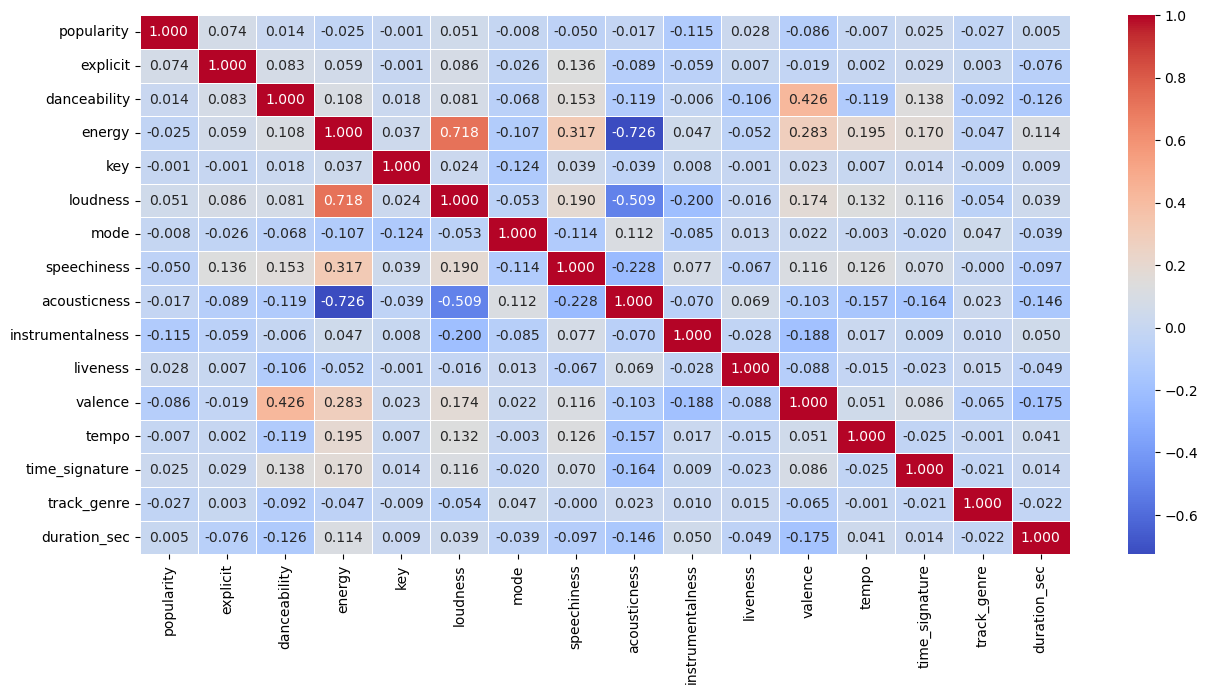

In [51]:
# Correlation Matrix
correlationMatrix = genreNumerics.corr()

# Plot Correlation Matrix
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.savefig("Correlation_Matrix.png")
plt.show()

## Let's look at some interesting variables given our correlation matrix 

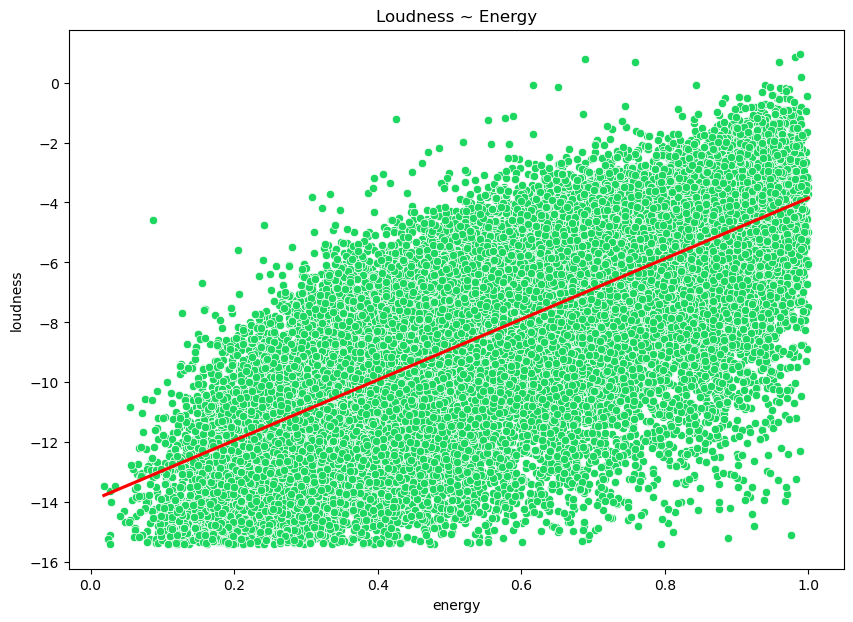

In [56]:
# Scatterplot for Loudness & Energy 
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=genreNumerics, x='energy', y='loudness', color='#1ED760')
sns.regplot(data=genreNumerics, x='energy', y='loudness', color='red', scatter=False)  # regression line 
plt.title('Loudness ~ Energy')
plt.show()

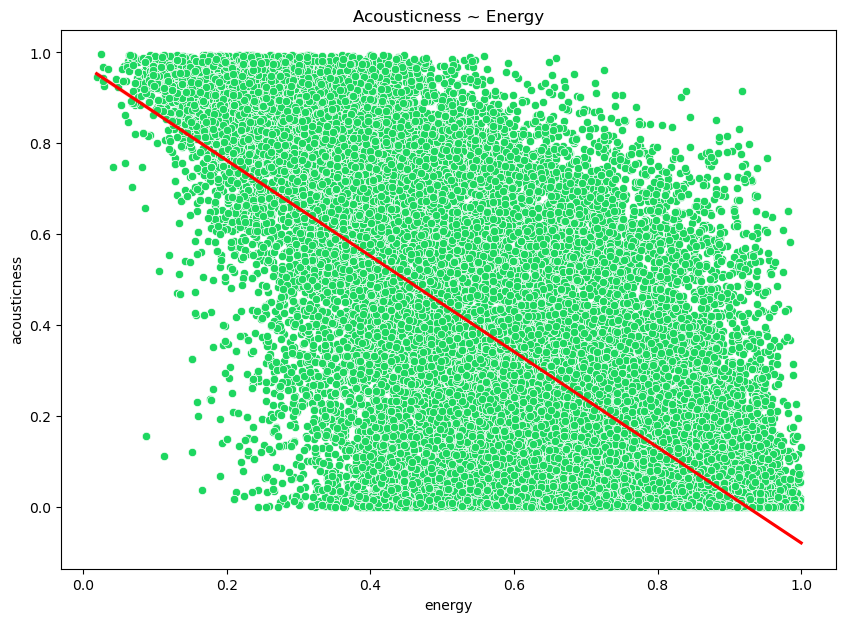

In [57]:
# Scatterplot for Acousticness & Energy 
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=genreNumerics, x='energy', y='acousticness', color='#1ED760')
sns.regplot(data=genreNumerics, x='energy', y='acousticness', color='red', scatter=False)  # regression line 
plt.title('Acousticness ~ Energy')
plt.show()

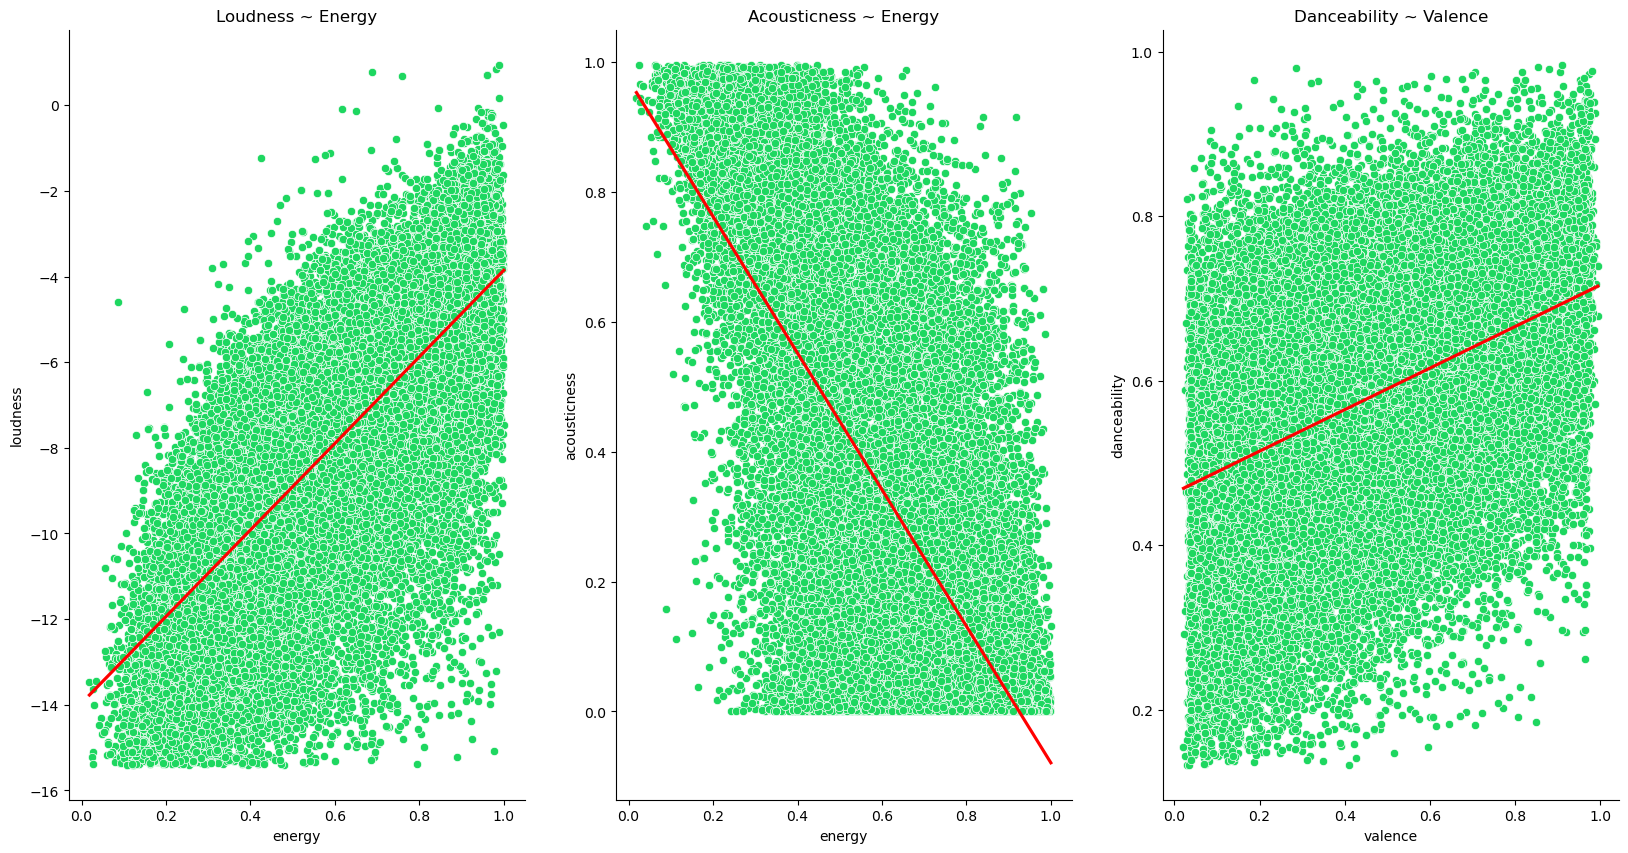

In [58]:
# Scatterplots
# Scatterplot for Loudness & Energy 
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 10))
sns.scatterplot(data=genreNumerics, x='energy', y='loudness', color='#1ED760', ax=ax1)
sns.regplot(data=genreNumerics, x='energy', y='loudness', color='red', scatter=False, ax=ax1)  # regression line 
ax1.set_title('Loudness ~ Energy')
sns.scatterplot(data=genreNumerics, x='energy', y='acousticness', color='#1ED760', ax=ax2)
sns.regplot(data=genreNumerics, x='energy', y='acousticness', color='red', scatter=False, ax=ax2)  # regression line 
ax2.set_title('Acousticness ~ Energy')
sns.scatterplot(data=genreNumerics, x='valence', y='danceability', color='#1ED760', ax=ax3)
sns.regplot(data=genreNumerics, x='valence', y='danceability', color='red', scatter=False, ax=ax3)  # regression line 
ax3.set_title('Danceability ~ Valence')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
plt.savefig('Loudness-Acousticness-Energy-Scatterplot.png')
plt.show()

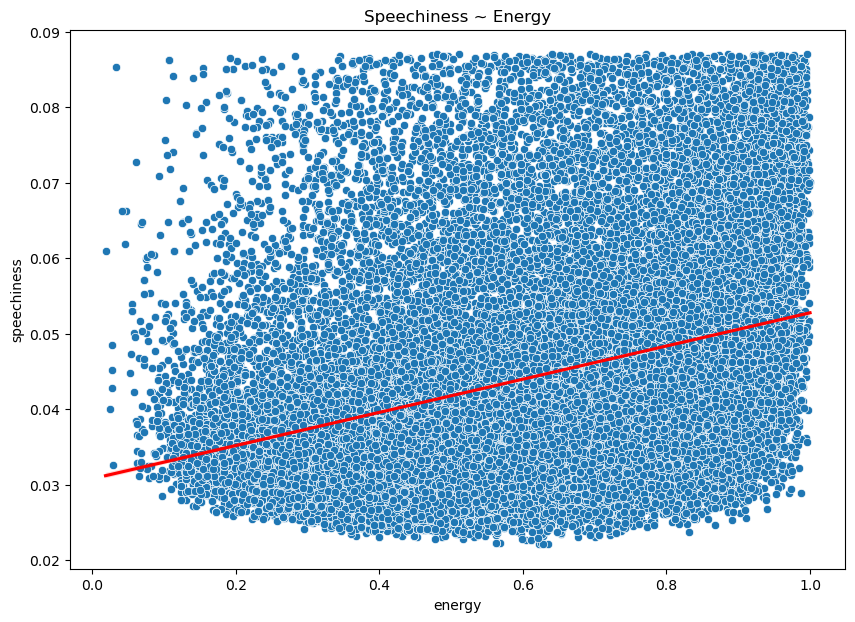

In [59]:
# Scatterplot for Speechiness & Energy 
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=genreNumerics, x='energy', y='speechiness')
sns.regplot(data=genreNumerics, x='energy', y='speechiness', color='red', scatter=False)  # regression line 
plt.title('Speechiness ~ Energy')
plt.show()

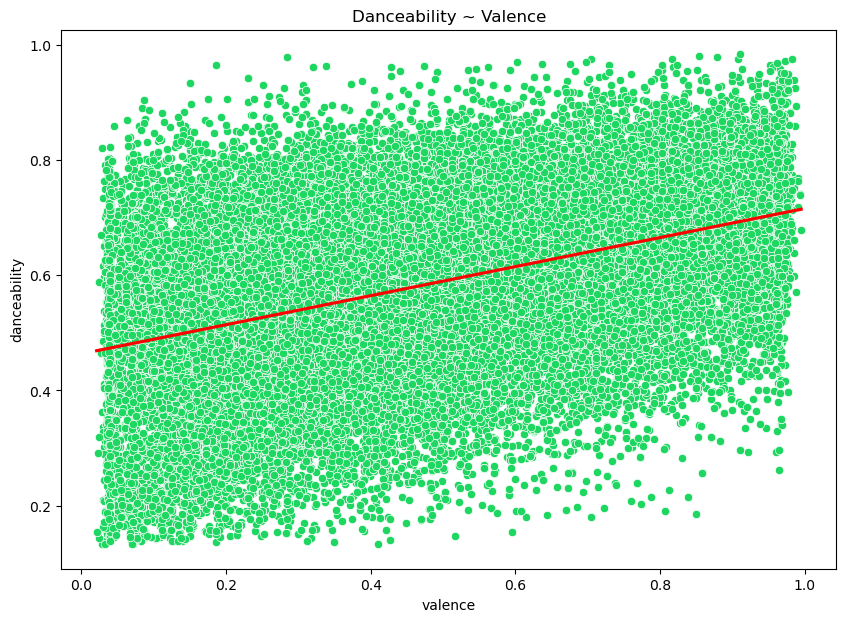

In [60]:
# Scatterplot for Danceibility & Valence
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=genreNumerics, x='valence', y='danceability', color='#1ED760')
sns.regplot(data=genreNumerics, x='valence', y='danceability', color='red', scatter=False)  # regression line 
plt.title('Danceability ~ Valence')
plt.savefig('Danceability-Valence-Scatterplot.png')
plt.show()

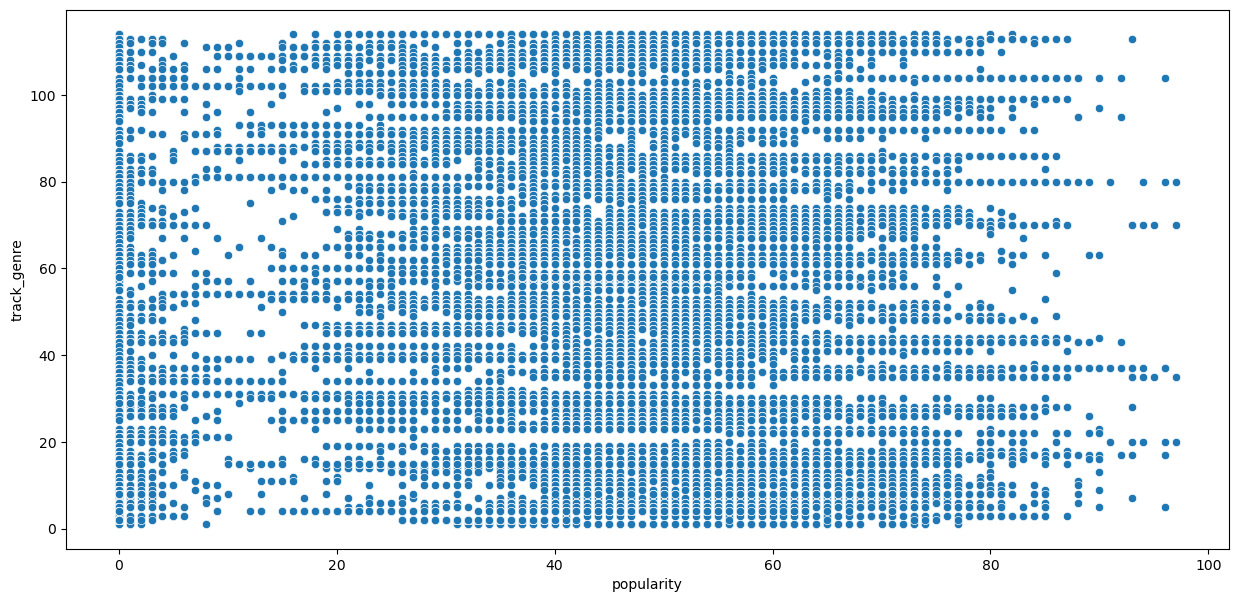

In [61]:
# Lookng at Explicit & Genre
fig, ax = plt.subplots(figsize=(15,7))
sns.scatterplot(data=genreNumerics, x='popularity', y='track_genre')
plt.show()

## Prepare our Datasets

In [52]:
# Dataset Copies

# Original (renaming for clarity)
songsOriginal = genreNumerics.copy()

# Scaled
songsScaled = genreNumerics.copy()
songsScaled = songsScaled.drop(['explicit', 'popularity'], axis = 1)

In [63]:
# Original Dataset
songsOriginal.head(10)

popularity  explicit  danceability  energy  key  loudness  mode  \
2           57     False         0.438   0.359    0    -9.734     1   
4           82     False         0.618   0.443    2    -9.681     1   
6           74     False         0.407   0.147    2    -8.822     1   
7           80     False         0.703   0.444   11    -9.331     1   
8           74     False         0.625   0.414    0    -8.700     1   
9           56     False         0.442   0.632    1    -6.770     1   
10          74     False         0.627   0.363    8    -8.127     1   
11          69     False         0.483   0.303    4   -10.058     1   
12          52     False         0.489   0.314    7    -9.245     0   
13          62     False         0.691   0.234    3    -6.441     1   

    speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
2        0.0557         0.210          0.000000    0.1170   0.1200   76.332   
4        0.0526         0.469          0.000000    0.0829   0.1670  119.949   
6        0.0355         0.857          0.000003    0.0913   0.0765  141.284   
7        0.0417         0.559          0.000000    0.0973   0.7120  150.960   
8        0.0369         0.294          0.000000    0.1510   0.6690  130.088   
9        0.0295         0.426          0.004190    0.0735   0.1960   78.899   
10       0.0291         0.279          0.000000    0.0928   0.3010   99.905   
11       0.0429         0.694          0.000000    0.1150   0.1390  133.406   
12       0.0331         0.749          0.000000    0.1130   0.6070  124.234   
13       0.0285         0.777          0.000000    0.1200   0.2090   87.103   

    time_signature  track_genre  duration_sec  
2                4          114       210.826  
4                4          114       198.853  
6                3          114       229.400  
7                4          114       242.946  
8                4          114       189.613  
9                4          114       205.594  
10               4          114       244.800  
11               3          114       240.165  
12               4          114       198.712  
13               4          114       248.448

In [53]:
# Scaled Dataset

# Standardize Select Attributes 
attributes = ['tempo', 'duration_sec', 'loudness']
for var in attributes:
    n = songsScaled[var].count()
    songsScaled[var] = ((songsScaled[var] - songsScaled[var].mean()) / songsScaled[var].std())

songsScaled.head(10)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
2          0.438   0.359    0 -0.678621     1       0.0557         0.210   
4          0.618   0.443    2 -0.661451     1       0.0526         0.469   
6          0.407   0.147    2 -0.383171     1       0.0355         0.857   
7          0.703   0.444   11 -0.548066     1       0.0417         0.559   
8          0.625   0.414    0 -0.343648     1       0.0369         0.294   
9          0.442   0.632    1  0.281592     1       0.0295         0.426   
10         0.627   0.363    8 -0.158019     1       0.0291         0.279   
11         0.483   0.303    4 -0.783583     1       0.0429         0.694   
12         0.489   0.314    7 -0.520205     0       0.0331         0.749   
13         0.691   0.234    3  0.388175     1       0.0285         0.777   

    instrumentalness  liveness  valence     tempo  time_signature  \
2           0.000000    0.1170   0.1200 -1.658698               4   
4           0.000000    0.0829   0.1670 -0.056235               4   
6           0.000003    0.0913   0.0765  0.727601               3   
7           0.000000    0.0973   0.7120  1.083091               4   
8           0.000000    0.1510   0.6690  0.316266               4   
9           0.004190    0.0735   0.1960 -1.564388               4   
10          0.000000    0.0928   0.3010 -0.792640               4   
11          0.000000    0.1150   0.1390  0.438167               3   
12          0.000000    0.1130   0.6070  0.101193               4   
13          0.000000    0.1200   0.2090 -1.262978               4   

    track_genre  duration_sec  
2           114     -0.188924  
4           114     -0.395075  
6           114      0.130883  
7           114      0.364117  
8           114     -0.554169  
9           114     -0.279009  
10          114      0.396040  
11          114      0.316234  
12          114     -0.397503  
13          114      0.458851

In [54]:
# PCA Datasets

# 1 PCA
songs1PCA = songsScaled.copy()

# 3 PCA
songs3PCA = songsScaled.copy()

In [66]:
songs1PCA

danceability  energy  key  loudness  mode  speechiness  acousticness  \
2              0.438   0.359    0 -0.678621     1       0.0557        0.2100   
4              0.618   0.443    2 -0.661451     1       0.0526        0.4690   
6              0.407   0.147    2 -0.383171     1       0.0355        0.8570   
7              0.703   0.444   11 -0.548066     1       0.0417        0.5590   
8              0.625   0.414    0 -0.343648     1       0.0369        0.2940   
...              ...     ...  ...       ...   ...          ...           ...   
113982         0.437   0.638    4  0.374569     0       0.0308        0.2110   
113984         0.541   0.583    2  0.191856     1       0.0285        0.0142   
113993         0.505   0.687   10  1.057473     1       0.0287        0.0841   
113997         0.629   0.329    0 -1.054737     0       0.0420        0.8670   
113999         0.526   0.487    1 -0.830881     0       0.0725        0.6810   

        instrumentalness  liveness  valence     tempo  time_signature  \
2               0.000000    0.1170   0.1200 -1.658698               4   
4               0.000000    0.0829   0.1670 -0.056235               4   
6               0.000003    0.0913   0.0765  0.727601               3   
7               0.000000    0.0973   0.7120  1.083091               4   
8               0.000000    0.1510   0.6690  0.316266               4   
...                  ...       ...      ...       ...             ...   
113982          0.000428    0.1380   0.1590  0.974343               4   
113984          0.000000    0.1020   0.2760 -0.935814               4   
113993          0.000000    0.1880   0.3820 -0.639143               3   
113997          0.000000    0.0839   0.7430  0.400399               4   
113999          0.000000    0.0893   0.7080 -1.553403               4   

        track_genre  duration_sec  
2               114     -0.188924  
4               114     -0.395075  
6               114      0.130883  
7               114      0.364117  
8               114     -0.554169  
...             ...           ...  
113982           29      2.249607  
113984           29      0.266560  
113993           29      0.589329  
113997           29      0.855174  
113999           29      0.344833  

[45671 rows x 14 columns]

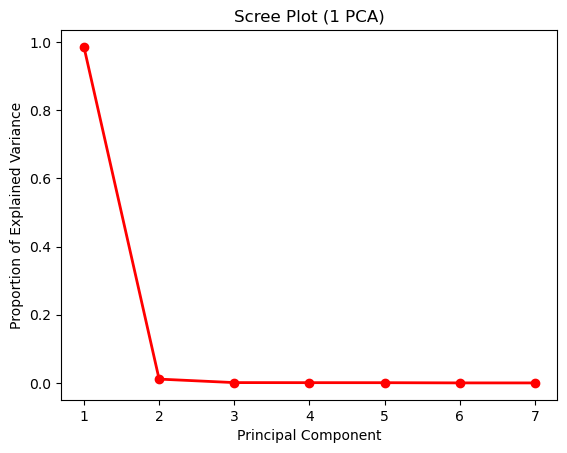

In [55]:
# 1 PCA - n_components = 7
pca1 = PCA(n_components = 7)
songs1PCA = pca1.fit(songs1PCA)


# Plot Explained Variance w/ Scree Plot
pcValues = range(1, pca1.n_components + 1) 
plt.plot(pcValues, pca1.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot (1 PCA)')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')
plt.show()


Our scree plot shows that for PCA, our elbow point will be at n_components = 2.

In [56]:
# Rerun PCA for 1 PCA Dataset With Optimal Component Value 
songs1PCA = songsScaled.copy()
pca1Optimal = PCA(n_components = 2)
songs1PCA = pca1Optimal.fit_transform(songs1PCA)

In [57]:
# 3 PCA Dataset

# Energetic Loud
energeticLoud = songs3PCA[['energy', 'loudness', 'speechiness']]
pcaEnergeticLoud = PCA(n_components = 1)
energeticLoud = pcaEnergeticLoud.fit_transform(energeticLoud)

# Upbeat Happy
upbeatHappy = songs3PCA[['danceability', 'valence', 'instrumentalness']]
pcaUpbeatHappy = PCA(n_components = 1)
upbeatHappy = pcaUpbeatHappy.fit_transform(upbeatHappy)

# Musical Measures
musicalMeasures = songs3PCA[['key', 'mode', 'tempo', 'time_signature']]
pcaMusicalMeasures = PCA(n_components = 1)
musicalMeasures = pcaMusicalMeasures.fit_transform(musicalMeasures)

# Plug New Attributes Into Dataset
songs3PCA = songs3PCA.drop(['energy', 'loudness', 'speechiness', 'danceability', 'valence', 'instrumentalness',
                            'key', 'mode', 'tempo', 'time_signature'], axis = 1)
songs3PCA['energetic_loud'] = energeticLoud
songs3PCA['upbeat_happy'] = upbeatHappy
songs3PCA['musical_measures'] = musicalMeasures

songs3PCA

acousticness  liveness  track_genre  duration_sec  energetic_loud  \
2             0.2100    0.1170          114     -0.188924       -0.712311   
4             0.4690    0.0829          114     -0.395075       -0.682006   
6             0.8570    0.0913          114      0.130883       -0.454411   
7             0.5590    0.0973          114      0.364117       -0.569938   
8             0.2940    0.1510          114     -0.554169       -0.372911   
...              ...       ...          ...           ...             ...   
113982        0.2110    0.1380           29      2.249607        0.371773   
113984        0.0142    0.1020           29      0.266560        0.182632   
113993        0.0841    0.1880           29      0.589329        1.053767   
113997        0.8670    0.0839           29      0.855174       -1.088448   
113999        0.6810    0.0893           29      0.344833       -0.842219   

        upbeat_happy  musical_measures  
2           0.149759         -5.282129  
4           0.091919         -3.279113  
6           0.181375         -3.278905  
7          -0.255116          5.721917  
8          -0.216211         -5.278049  
...              ...               ...  
113982      0.126402         -1.260313  
113984      0.037707         -3.280930  
113993     -0.021298          4.717095  
113997     -0.262112         -5.260910  
113999     -0.224058         -4.265093  

[45671 rows x 7 columns]

## Clustering

There are two approaches we can take here, both yielding different hypothetical results. We can either do hierarical clusering or K Means clustering.
1. With hierarichal clustering, we avoid having to define the number of clusters which saves us the effort in having to think about why we are choosing the size we are choosing for clusters. Hypothethically, this approach would reveal clusters based around the different genres in the dataset, which works good for what we want to achieve at least with making playlists just based on genre. A drawback with this approach is that since it is hierarichal clustering, we are looking at longer runtimes compared to KMeans. Using this <a href='https://hdbscan.readthedocs.io/en/latest/performance_and_scalability.html'>graph on different clustering algorithm runtimes</a>, we can see that our best option would be to use Fastcluster, which is a very fast version of SciPy's agglomerative clustering. 


2. KMeans clustering is going to be much faster, but we have to define the number of clusters to pass. This becomes an issue since music is very subjective in nature. If we define clusters as groups of genres, we are looking at a K size of 114, which would not work well with KMeans since it does not handle large K sizes well. If we deviate from K = 114 but keep the idea of having the clusters represent genres, we get into a very subjective area where we start having to redefine what exacly a genre is. I think the best approach here is to think about it in the context of the proposed app. If we give the user the choice of defining a K-size, that means that each cluster would be representative of a playlist, with the mixes varying with the K-size passed. KMeans would theoretically find clusters of music that isn't neccesarily grouped by genre but rather on interesting relationships between the genres given the K constraint. 

### KMeans Clustering - SKLearn 

[]

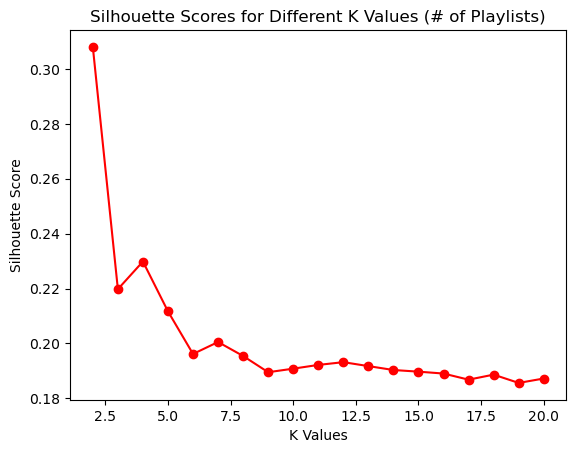

In [79]:
# KMeans Cluster - Original Dataset for Different K Values
# Remember - Clusters are playlists here

# Define & Fit Model, Saving Silhouette Scores for Each K Value
kValues = {}
clusters = range(2, 21)
for k in clusters:
    kMeans1 = KMeans(n_clusters = k, random_state=0).fit(songsOriginal)
    kMeansOriginalLabels = kMeans1.predict(songsOriginal)
    silhouetteScore = silhouette_score(songsOriginal, kMeansOriginalLabels)  # returns mean of all samples
    kValues[k] = silhouetteScore

# Plot
plt.plot(kValues.keys(), kValues.values(), color='red', marker = 'o')
plt.xlabel('K Values')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K Values (# of Playlists)')
plt.plot()

Best cluster here is shown as K = 2, yet it should be noted that because this is our original dataset and no transformations/dropped variables were made besides ID attributes, our silhouette score over all barely breaks past 30%.

[]

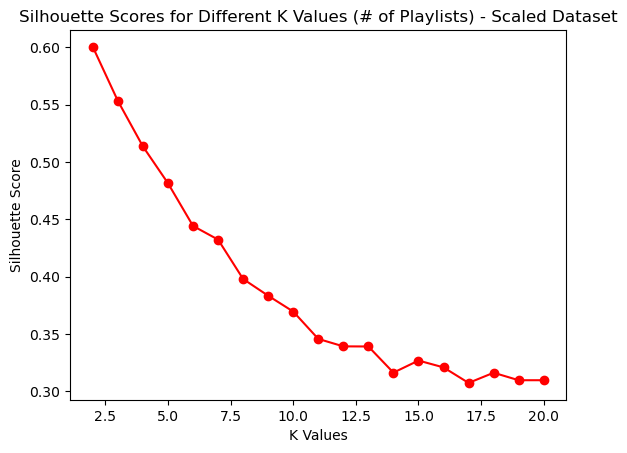

In [80]:
# KMeans Cluster - Scaled Dataset for Different K Values
# Remember - Clusters are playlists here

# Define & Fit Model, Saving Silhouette Scores for Each K Value
kValues = {}
clusters = range(2, 21)
for k in clusters:
    kMeans1 = KMeans(n_clusters = k, random_state=0).fit(songsScaled)
    kMeansOriginalLabels = kMeans1.predict(songsScaled)
    silhouetteScore = silhouette_score(songsScaled, kMeansOriginalLabels)  # returns mean of all samples
    kValues[k] = silhouetteScore

# Plot
plt.plot(kValues.keys(), kValues.values(), color='red', marker = 'o')
plt.xlabel('K Values')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K Values (# of Playlists) - Scaled Dataset')
plt.plot()

Our scaled dataset provides way higher silhouette scores than our original dataset (expected), but our optimal cluster size remains the same. Would be worth looking into some samples for each cluster to size up to K = 10 since those are silhouette scores higher than our original dataset model. We want to look into these samples to see if it is viable to deviate from an optimal cluster size of 2 in the case where a user would like to make more than 2 playlists from a big playlist. 

[]

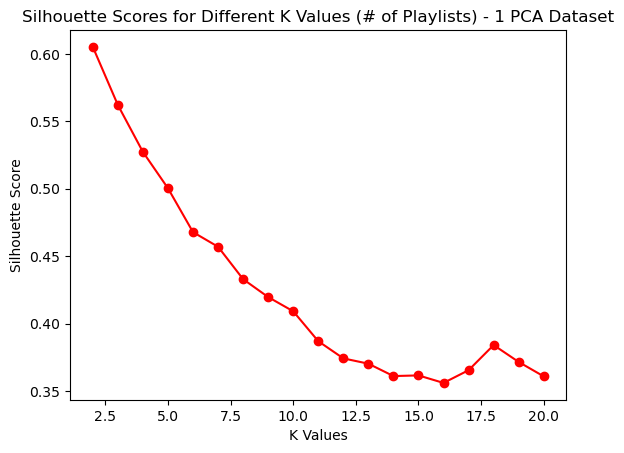

In [81]:
# KMeans Cluster - 1 PCA Dataset for Different K Values
# Remember - Clusters are playlists here

# Define & Fit Model, Saving Silhouette Scores for Each K Value
kValues = {}
clusters = range(2, 21)
for k in clusters:
    kMeans1 = KMeans(n_clusters = k, random_state=0).fit(songs1PCA)
    kMeansOriginalLabels = kMeans1.predict(songs1PCA)
    silhouetteScore = silhouette_score(songs1PCA, kMeansOriginalLabels)  # returns mean of all samples
    kValues[k] = silhouetteScore

# Plot
plt.plot(kValues.keys(), kValues.values(), color='red', marker = 'o')
plt.xlabel('K Values')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K Values (# of Playlists) - 1 PCA Dataset')
plt.plot()

Running PCA with n_components = 2 on our scaled dataset helps a little bit in those larger cluster sizes, but overall there is little to no effect on silhouette score, meaning that PCA will still yield the same amount of cluster consistency as the scaled dataset for the most part. 

[]

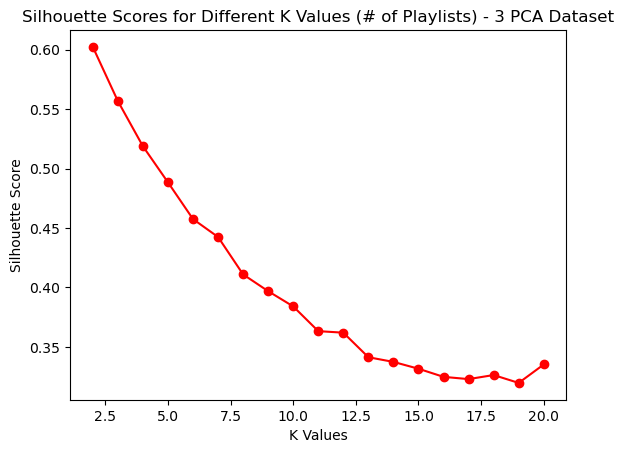

In [98]:
# KMeans Cluster - 3 PCA Dataset for Different K Values
# Remember - Clusters are playlists here

# Define & Fit Model, Saving Silhouette Scores for Each K Value
kValues = {}
clusters = range(2, 21)
for k in clusters:
    kMeans1 = KMeans(n_clusters = k, random_state=0).fit(songs3PCA)
    kMeansOriginalLabels = kMeans1.predict(songs3PCA)
    silhouetteScore = silhouette_score(songs3PCA, kMeansOriginalLabels)  # returns mean of all samples
    kValues[k] = silhouetteScore

# Plot
plt.plot(kValues.keys(), kValues.values(), color='red', marker = 'o')
plt.xlabel('K Values')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K Values (# of Playlists) - 3 PCA Dataset')
plt.plot()

Running PCA to make three different variables does not change much besides hurting the silouette scores in the bigger cluster sizes.

With our KMeans runs, all of the results produced that it would be best to split the dataset into two playlists. This might not be too reprensative of a real "big playlist" being cut down to a small playlist due to our N size of about 45k records. Lets take three different samples to sample different playlists sizes to see how our models react to the change. We are going to use the scaled dataset and songs1PCA datset for our samples as they seem like they work best with the models. 

In [88]:
# Make Sample Datasets

# Liked Songs
likedSongsScaled = songsScaled.sample(3000)  # 3000 songs
likedSongsPCA = pd.DataFrame(songs1PCA).sample(3000) 

# Big Playlist
bigPlaylistScaled = songsScaled.sample(1000)  #1000 songs
bigPlaylistPCA = pd.DataFrame(songs1PCA).sample(1000) 

# Medium Playlist
mediumPlaylistScaled = songsScaled.sample(500)  #500 songs
mediumPlaylistPCA = pd.DataFrame(songs1PCA).sample(500) 

[]

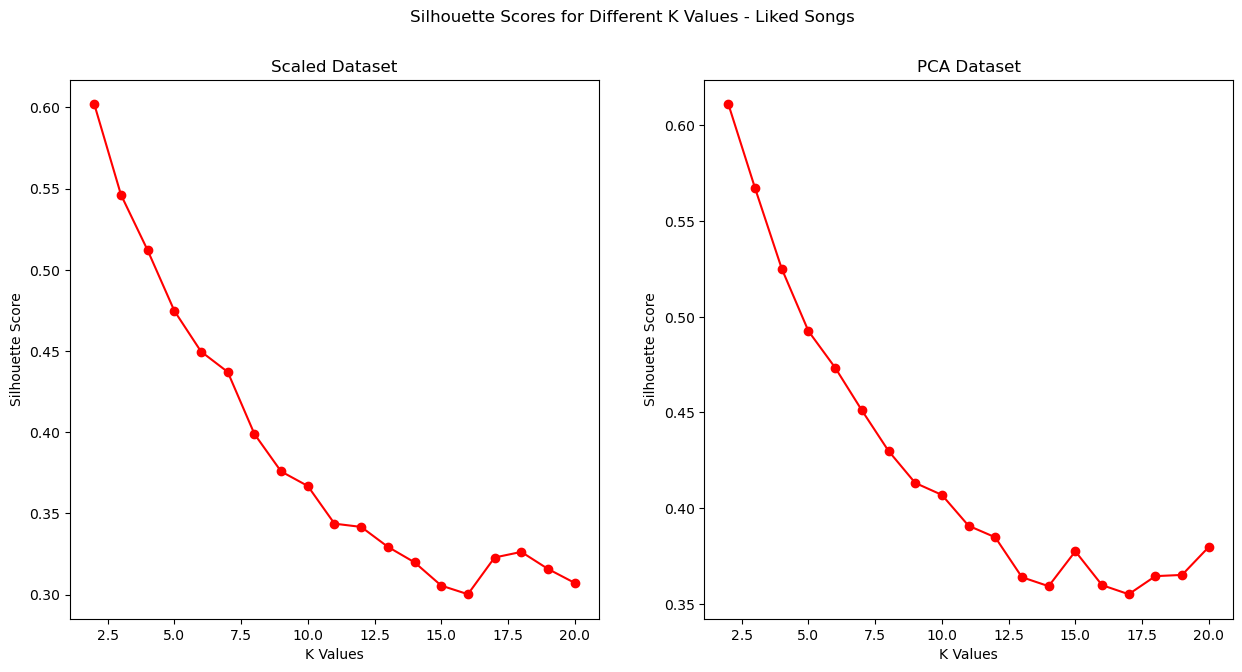

In [99]:
# Rerun KMeans w/ Sample Datasets

# Define & Fit Models, Saving Silhouette Scores for Each K Value

# Liked Songs Regular
kValuesReg = {}
clusters = range(2, 21)
for k in clusters:
    kMeans1 = KMeans(n_clusters = k, random_state=0).fit(likedSongsScaled)
    kMeansOriginalLabels = kMeans1.predict(likedSongsScaled)
    silhouetteScore = silhouette_score(likedSongsScaled, kMeansOriginalLabels)  # returns mean of all samples
    kValuesReg[k] = silhouetteScore

# Liked Songs PCA
kValuesPCA = {}
clusters = range(2, 21)
for j in clusters:
    kMeans1 = KMeans(n_clusters = j, random_state=0).fit(likedSongsPCA)
    kMeansPCALabels = kMeans1.predict(likedSongsPCA)
    silhouetteScore = silhouette_score(likedSongsPCA, kMeansPCALabels)  # returns mean of all samples
    kValuesPCA[j] = silhouetteScore

    
# Plot
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(15, 7))
ax1.plot(kValuesReg.keys(), kValuesReg.values(), color='red', marker = 'o')
ax2.plot(kValuesPCA.keys(), kValuesPCA.values(), color='red', marker = 'o')
ax1.set_xlabel('K Values')
ax1.set_ylabel('Silhouette Score')
ax1.set_title('Scaled Dataset')
ax2.set_xlabel('K Values')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('PCA Dataset')
plt.suptitle('Silhouette Scores for Different K Values - Liked Songs')
plt.plot()

[]

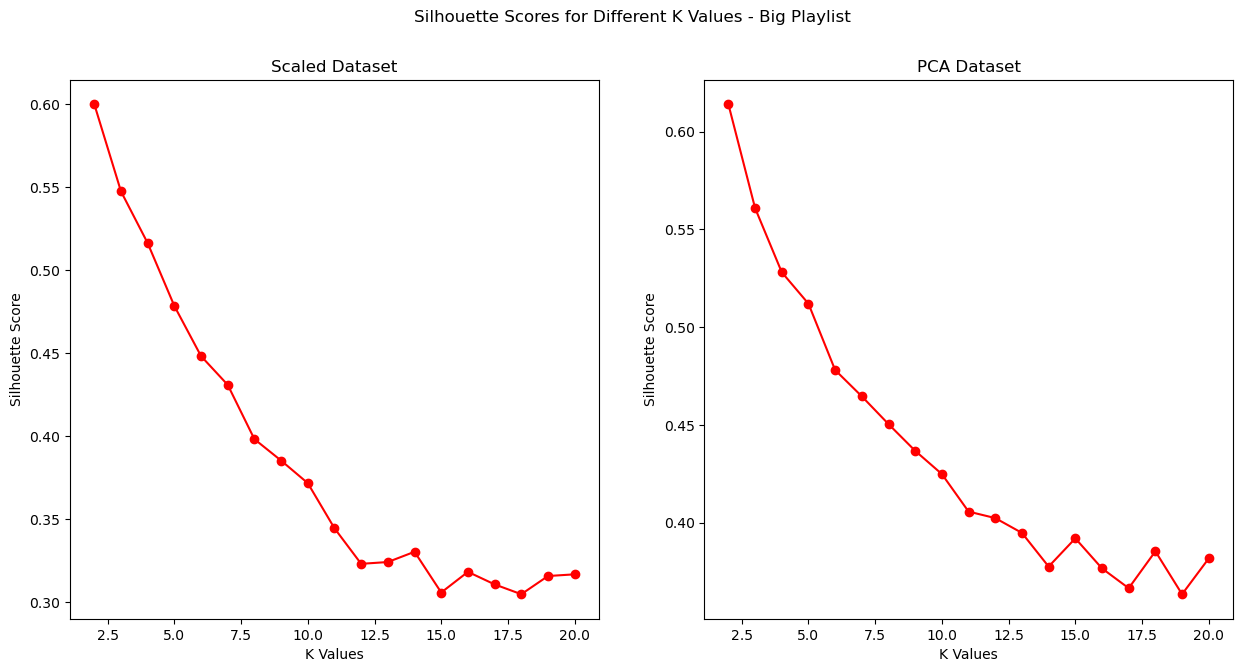

In [95]:
# Rerun KMeans w/ Sample Datasets

# Define & Fit Model, Saving Silhouette Scores for Each K Value

# Big Playlist Regular
kValuesReg = {}
clusters = range(2, 21)
for k in clusters:
    kMeans1 = KMeans(n_clusters = k, random_state=0).fit(bigPlaylistScaled)
    kMeansOriginalLabels = kMeans1.predict(bigPlaylistScaled)
    silhouetteScore = silhouette_score(bigPlaylistScaled, kMeansOriginalLabels)  # returns mean of all samples
    kValuesReg[k] = silhouetteScore

# Big Playlist PCA
kValuesPCA = {}
clusters = range(2, 21)
for j in clusters:
    kMeans1 = KMeans(n_clusters = j, random_state=0).fit(bigPlaylistPCA)
    kMeansPCALabels = kMeans1.predict(bigPlaylistPCA)
    silhouetteScore = silhouette_score(bigPlaylistPCA, kMeansPCALabels)  # returns mean of all samples
    kValuesPCA[j] = silhouetteScore

    
# Plot
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(15, 7))
ax1.plot(kValuesReg.keys(), kValuesReg.values(), color='red', marker = 'o')
ax2.plot(kValuesPCA.keys(), kValuesPCA.values(), color='red', marker = 'o')
ax1.set_xlabel('K Values')
ax1.set_ylabel('Silhouette Score')
ax1.set_title('Scaled Dataset')
ax2.set_xlabel('K Values')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('PCA Dataset')
plt.suptitle('Silhouette Scores for Different K Values - Big Playlist')
plt.plot()

[]

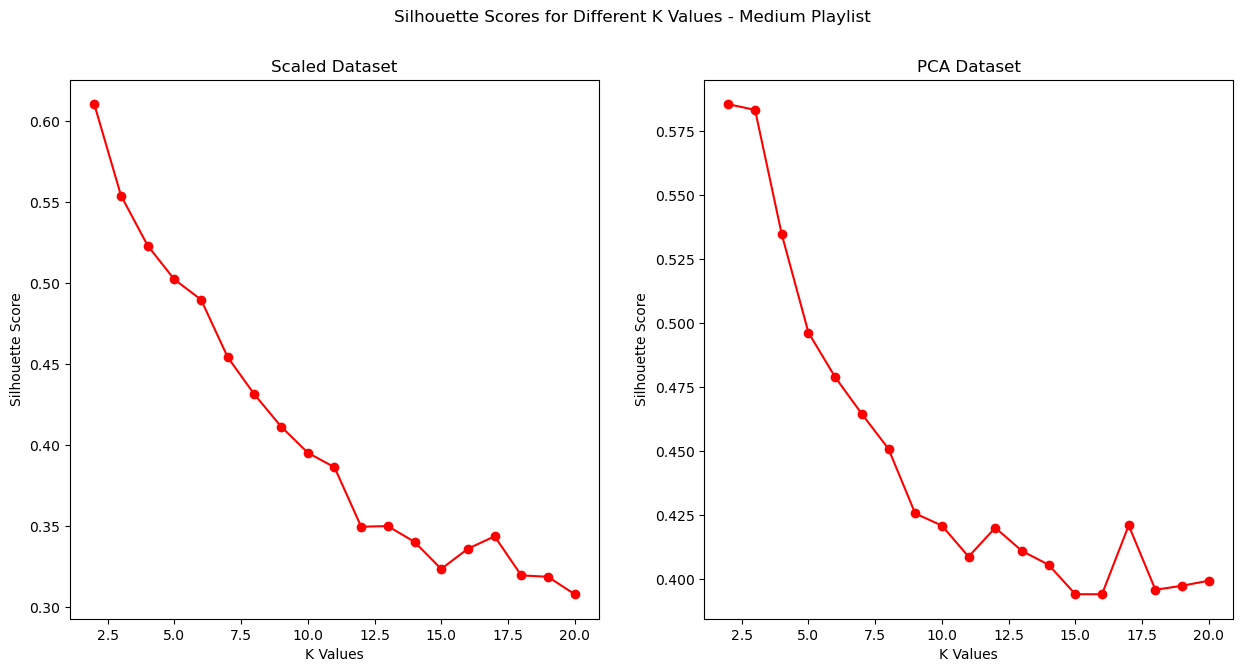

In [97]:
# Rerun KMeans w/ Sample Datasets

# Define & Fit Model, Saving Silhouette Scores for Each K Value

# Medium Playlist Regular
kValuesReg = {}
clusters = range(2, 21)
for k in clusters:
    kMeans1 = KMeans(n_clusters = k, random_state=0).fit(mediumPlaylistScaled)
    kMeansOriginalLabels = kMeans1.predict(mediumPlaylistScaled)
    silhouetteScore = silhouette_score(mediumPlaylistScaled, kMeansOriginalLabels)  # returns mean of all samples
    kValuesReg[k] = silhouetteScore

# Medium Playlist PCA
kValuesPCA = {}
clusters = range(2, 21)
for j in clusters:
    kMeans1 = KMeans(n_clusters = j, random_state=0).fit(mediumPlaylistPCA)
    kMeansPCALabels = kMeans1.predict(mediumPlaylistPCA)
    silhouetteScore = silhouette_score(mediumPlaylistPCA, kMeansPCALabels)  # returns mean of all samples
    kValuesPCA[j] = silhouetteScore

    
# Plot
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(15, 7))
ax1.plot(kValuesReg.keys(), kValuesReg.values(), color='red', marker = 'o')
ax2.plot(kValuesPCA.keys(), kValuesPCA.values(), color='red', marker = 'o')
ax1.set_xlabel('K Values')
ax1.set_ylabel('Silhouette Score')
ax1.set_title('Scaled Dataset')
ax2.set_xlabel('K Values')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('PCA Dataset')
plt.suptitle('Silhouette Scores for Different K Values - Medium Playlist')
plt.plot()

Rerunning KMeans with smaller sample sizes doesn't really change anything. All the scree plots for different K values still look relatively the same compared to the runs we got with the entire N size. Let's look at a few samples for each cluster size to determine what these groups look like. From this point on, we will stick with the scaled dataset, although it should be noted there is practically no difference between the scaled and 1 PCA datasets. 

In [100]:
# K = 2
kMeansK2 = KMeans(n_clusters = 2, random_state=0).fit(songsScaled)
kMeansK2Labels = kMeansK2.predict(songsScaled)

In [121]:
# Make Algorithm to Find Active Genres Within Each Cluster 

# Make Copy of Scaled Dataset w/ a Cluster Column
songsClusteredKMeans = songsScaled.copy()
songsClusteredKMeans['cluster'] = kMeansK2Labels  # K = 2 

# For each cluster, compute percentages for genres
def computeGenrePercentages(dataClustered):
    
    # Give english labels to genre back for readability
    genres = ['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
           'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
           'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
           'chill', 'classical', 'club', 'comedy', 'country', 'dance',
           'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
           'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
           'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
           'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
           'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
           'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
           'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
           'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
           'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
           'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
           'power-pop', 'progressive-house', 'psych-rock', 'punk-rock',
           'punk', 'r-n-b', 'reggae', 'reggaeton', 'rock-n-roll', 'rock',
           'rockabilly', 'romance', 'sad', 'salsa', 'samba', 'sertanejo',
           'show-tunes', 'singer-songwriter', 'ska', 'sleep', 'songwriter',
           'soul', 'spanish', 'study', 'swedish', 'synth-pop', 'tango',
           'techno', 'trance', 'trip-hop', 'turkish', 'world-music']

    # Convert Genres to Numbers
    genreCount = len(genres)
    while genreCount > 0:

        for genre in genres:

            dataClustered['track_genre'] = dataClustered['track_genre'].replace(genreCount, genre) 

            # Update tickers
            genres.remove(genre)
            genreCount = len(genres)
    
    # Find Percentages
    genrePercentages = {}  # Saving pecentages for each genre for each cluster 
    for cluster in dataClustered['cluster'].unique():
        temp = dataClustered[dataClustered['cluster'] == cluster]  # Just the one cluster 
        genrePercentages[cluster] = {} 
        
        for genre in temp['track_genre']:  # Every Available Genre Gets a Percentage
            genrePercentages[cluster][genre] = (((temp['track_genre'] == genre).sum()) / len(temp))
    
    return genrePercentages

# Print Results
k2GenrePercentages = computeGenrePercentages(songsClusteredKMeans)
for cluster in songsClusteredKMeans['cluster'].unique():
    print(f"Cluster {cluster} Genre Percentages:")
    for genre, percentage in k2GenrePercentages[cluster].items():
        print(f"\t{genre}: {percentage * 100:.2f}%")
    print()

Cluster 0 Genre Percentages:
	acoustic: 2.96%
	afrobeat: 2.09%
	alt-rock: 2.09%
	ambient: 1.26%
	anime: 1.76%
	black-metal: 0.99%
	blues: 1.86%
	breakbeat: 1.48%
	cantopop: 2.86%
	children: 1.95%
	classical: 0.42%
	comedy: 0.22%
	dance: 1.54%
	death-metal: 0.85%
	detroit-techno: 1.35%
	disney: 1.14%
	dub: 1.97%
	edm: 1.85%
	electronic: 2.14%
	folk: 2.34%
	french: 1.74%
	garage: 2.11%
	gospel: 2.01%
	grindcore: 0.44%
	grunge: 2.28%
	happy: 1.03%
	hardcore: 1.05%
	heavy-metal: 1.58%
	honky-tonk: 2.42%
	idm: 1.57%
	indie-pop: 2.28%
	industrial: 1.59%
	j-dance: 0.65%
	j-pop: 1.98%
	jazz: 1.26%
	kids: 1.36%
	latino: 1.23%
	mandopop: 3.20%
	metalcore: 0.99%
	mpb: 1.86%
	opera: 1.77%
	party: 1.11%
	pop-film: 2.51%
	power-pop: 2.06%
	psych-rock: 1.95%
	punk: 2.04%
	reggae: 1.31%
	rock-n-roll: 2.01%
	rockabilly: 1.81%
	sad: 1.56%
	samba: 0.97%
	show-tunes: 1.68%
	ska: 1.81%
	songwriter: 2.52%
	spanish: 1.97%
	swedish: 2.09%
	tango: 1.84%
	trance: 1.39%
	turkish: 1.82%

Cluster 1 Genre Percentag

In [124]:
# K = 3
kMeansK3 = KMeans(n_clusters = 3, random_state=0).fit(songsScaled)
kMeansK3Labels = kMeansK3.predict(songsScaled)

# Make Copy of Scaled Dataset w/ a Cluster Column
songsClusteredKMeans = songsScaled.copy()
songsClusteredKMeans['cluster'] = kMeansK3Labels  

k3GenrePercentages = computeGenrePercentages(songsClusteredKMeans)
for cluster in songsClusteredKMeans['cluster'].unique():
    print(f"Cluster {cluster} Genre Percentages:")
    for genre, percentage in k3GenrePercentages[cluster].items():
        print(f"\t{genre}: {percentage * 100:.2f}%")
    print()

Cluster 1 Genre Percentages:
	acoustic: 4.93%
	alt-rock: 3.49%
	ambient: 2.09%
	black-metal: 1.65%
	blues: 3.10%
	breakbeat: 2.46%
	cantopop: 4.76%
	children: 3.25%
	classical: 0.70%
	comedy: 0.37%
	dance: 2.56%
	death-metal: 1.42%
	detroit-techno: 2.25%
	disney: 1.90%
	dub: 3.27%
	edm: 3.07%
	electronic: 3.57%
	folk: 3.89%
	french: 2.90%
	garage: 3.52%
	gospel: 3.34%
	grindcore: 0.73%
	grunge: 3.80%
	happy: 1.71%
	hardcore: 1.75%
	heavy-metal: 2.63%
	honky-tonk: 4.03%
	idm: 2.62%
	indie-pop: 3.79%
	industrial: 2.65%
	j-dance: 1.08%
	j-pop: 3.30%
	jazz: 2.10%
	kids: 2.26%
	latino: 2.05%
	mandopop: 5.33%
	metalcore: 1.65%

Cluster 0 Genre Percentages:
	afrobeat: 3.01%
	anime: 2.54%
	brazil: 2.22%
	chicago-house: 2.14%
	club: 3.00%
	dancehall: 1.19%
	disco: 2.95%
	dubstep: 3.08%
	emo: 2.70%
	funk: 1.71%
	goth: 2.74%
	guitar: 2.61%
	hardstyle: 1.66%
	house: 2.69%
	indie: 3.31%
	j-idol: 2.38%
	k-pop: 2.76%
	malay: 3.07%
	minimal-techno: 2.18%
	mpb: 2.68%
	opera: 2.55%
	party: 1.60%
	pop-fi

In [126]:
# K = 4
kMeansK4 = KMeans(n_clusters = 4, random_state=0).fit(songsScaled)
kMeansK4Labels = kMeansK4.predict(songsScaled)

# Make Copy of Scaled Dataset w/ a Cluster Column
songsClusteredKMeans = songsScaled.copy()
songsClusteredKMeans['cluster'] = kMeansK4Labels  

k4GenrePercentages = computeGenrePercentages(songsClusteredKMeans)
for cluster in songsClusteredKMeans['cluster'].unique():
    print(f"Cluster {cluster} Genre Percentages:")
    for genre, percentage in k4GenrePercentages[cluster].items():
        print(f"\t{genre}: {percentage * 100:.2f}%")
    print()

Cluster 1 Genre Percentages:
	acoustic: 6.00%
	alt-rock: 4.24%
	ambient: 2.54%
	black-metal: 2.00%
	blues: 3.77%
	breakbeat: 2.99%
	cantopop: 5.80%
	children: 3.95%
	classical: 0.85%
	comedy: 0.45%
	dance: 3.11%
	death-metal: 1.73%
	detroit-techno: 2.74%
	disney: 2.32%
	dub: 3.98%
	edm: 3.74%
	electronic: 4.34%
	folk: 4.74%
	french: 3.52%
	garage: 4.28%
	gospel: 4.07%
	grindcore: 0.89%
	grunge: 4.62%
	happy: 2.08%
	hardcore: 2.13%
	heavy-metal: 3.20%
	honky-tonk: 4.90%
	idm: 3.18%
	indie-pop: 4.62%
	industrial: 3.22%

Cluster 3 Genre Percentages:
	afrobeat: 4.12%
	anime: 3.48%
	j-dance: 1.29%
	j-pop: 3.92%
	jazz: 2.50%
	kids: 2.68%
	latino: 2.44%
	mandopop: 6.33%
	metalcore: 1.96%
	mpb: 3.67%
	opera: 3.49%
	party: 2.19%
	pop-film: 4.97%
	power-pop: 4.08%
	psych-rock: 3.85%
	punk: 4.04%
	reggae: 2.59%
	rock-n-roll: 3.98%
	rockabilly: 3.58%
	sad: 3.08%
	samba: 1.92%
	show-tunes: 3.31%
	ska: 3.57%
	songwriter: 4.98%
	spanish: 3.88%
	swedish: 4.14%
	tango: 3.63%
	trance: 2.75%
	turkish: 3.

In [125]:
# K = 5
kMeansK5 = KMeans(n_clusters = 5, random_state=0).fit(songsScaled)
kMeansK5Labels = kMeansK5.predict(songsScaled)

# Make Copy of Scaled Dataset w/ a Cluster Column
songsClusteredKMeans = songsScaled.copy()
songsClusteredKMeans['cluster'] = kMeansK5Labels  

k5GenrePercentages = computeGenrePercentages(songsClusteredKMeans)
for cluster in songsClusteredKMeans['cluster'].unique():
    print(f"Cluster {cluster} Genre Percentages:")
    for genre, percentage in k5GenrePercentages[cluster].items():
        print(f"\t{genre}: {percentage * 100:.2f}%")
    print()

Cluster 1 Genre Percentages:
	acoustic: 7.61%
	alt-rock: 5.39%
	ambient: 3.23%
	black-metal: 2.54%
	blues: 4.78%
	breakbeat: 3.80%
	cantopop: 7.36%
	children: 5.01%
	classical: 1.08%
	comedy: 0.57%
	dance: 3.96%
	death-metal: 2.19%
	detroit-techno: 3.48%
	disney: 2.94%
	dub: 5.06%
	edm: 4.75%
	electronic: 5.51%
	folk: 6.02%
	french: 4.47%
	garage: 5.43%
	gospel: 5.17%
	grindcore: 1.13%
	grunge: 5.87%
	happy: 2.64%

Cluster 0 Genre Percentages:
	afrobeat: 5.50%
	anime: 4.64%
	brazil: 4.06%
	chicago-house: 3.90%
	club: 5.47%
	dancehall: 2.17%
	disco: 5.39%
	dubstep: 5.63%
	emo: 4.93%
	funk: 3.13%
	goth: 5.01%
	guitar: 4.77%
	hardstyle: 3.04%
	samba: 2.56%
	show-tunes: 4.41%
	ska: 4.76%
	songwriter: 6.64%
	spanish: 5.18%
	swedish: 5.52%
	tango: 4.84%
	trance: 3.67%
	turkish: 4.78%

Cluster 4 Genre Percentages:
	alternative: 4.60%
	british: 5.84%
	country: 5.51%
	drum-and-bass: 4.92%
	forro: 4.92%
	groove: 5.27%
	house: 4.96%
	indie: 6.10%
	j-idol: 4.39%
	k-pop: 5.10%
	malay: 5.67%
	minima

In [127]:
# K = 10
kMeansK10 = KMeans(n_clusters = 10, random_state=0).fit(songsScaled)
kMeansK10Labels = kMeansK10.predict(songsScaled)

# Make Copy of Scaled Dataset w/ a Cluster Column
songsClusteredKMeans = songsScaled.copy()
songsClusteredKMeans['cluster'] = kMeansK10Labels  

k10GenrePercentages = computeGenrePercentages(songsClusteredKMeans)
for cluster in songsClusteredKMeans['cluster'].unique():
    print(f"Cluster {cluster} Genre Percentages:")
    for genre, percentage in k10GenrePercentages[cluster].items():
        print(f"\t{genre}: {percentage * 100:.2f}%")
    print()

Cluster 2 Genre Percentages:
	acoustic: 16.79%
	alt-rock: 11.88%
	ambient: 7.12%
	black-metal: 5.61%
	blues: 10.55%
	breakbeat: 8.38%
	cantopop: 16.23%
	children: 11.06%
	classical: 2.38%
	comedy: 1.26%
	dance: 8.72%

Cluster 1 Genre Percentages:
	afrobeat: 10.58%
	sad: 7.90%
	samba: 4.93%
	show-tunes: 8.49%
	ska: 9.16%
	songwriter: 12.77%
	spanish: 9.97%
	swedish: 10.62%
	tango: 9.32%
	trance: 7.06%
	turkish: 9.21%

Cluster 9 Genre Percentages:
	alternative: 8.99%
	british: 11.42%
	country: 10.77%
	drum-and-bass: 9.61%
	forro: 9.61%
	groove: 10.30%
	hip-hop: 5.53%
	iranian: 3.37%
	sleep: 0.69%
	study: 10.64%
	techno: 8.88%
	world-music: 10.19%

Cluster 8 Genre Percentages:
	anime: 9.44%
	brazil: 8.27%
	chicago-house: 7.95%
	club: 11.14%
	dancehall: 4.41%
	disco: 10.98%
	dubstep: 11.47%
	emo: 10.04%
	funk: 6.36%
	goth: 10.20%
	guitar: 9.72%

Cluster 0 Genre Percentages:
	bluegrass: 10.86%
	deep-house: 11.61%
	german: 4.54%
	indian: 11.45%
	latin: 6.93%
	metal: 8.52%
	new-age: 3.47%
	pr

After looking at cluster samples and testing different ways in which we can input data into the model, this clustering is not what was expected once ran. First of all, the cluster sizes and silhouette scores are not what was expected. Our best clustering was with a K size of 2, no matter the sample size. This means that at least within the context of this project, the best number of playlists to make based off a bigger playlist is 2. Looking more into how genres were grouped within clusters, we get weird, unexpected mixes. For our optimal size, the more genres that are in the original set, the more odd mixes we get of genres. It should be noted that it is weird to truly asses how these groups were grouped without listening to the songs that were clustered. It would very well be that the genres LOOK weird together, but feels good listening to it in a playlist. As our K size goes up, we get more weird mixes of genres that I can't imagine are good/make sense together. For example, in our clustering for K = 10, our cluster 5 groups death metal and Disney music together. Albeit, this was a cluster size with a lower silouette score than the others we chose to look into, but groupings like this are not uncommon with the samples. This approach may honestly be viable because there are definitely areas that make sense as well, such as a possible coehrent theme of slower, traquil music with cluster 1 in K = 10. The only thing that keeps us from fully commiting to this being a viable option would be the fact that it is hard to truly assess how good these playlists actually are without listening to any of the music. In the futre, it may work better to either make a dataset from scratch using the Spotify API, or altogether directly porting/querying data from the API to play around with different types of inputs and genres. 

### Agglomerative Hierarichal Clustering: Ward Linkage - SciPy 

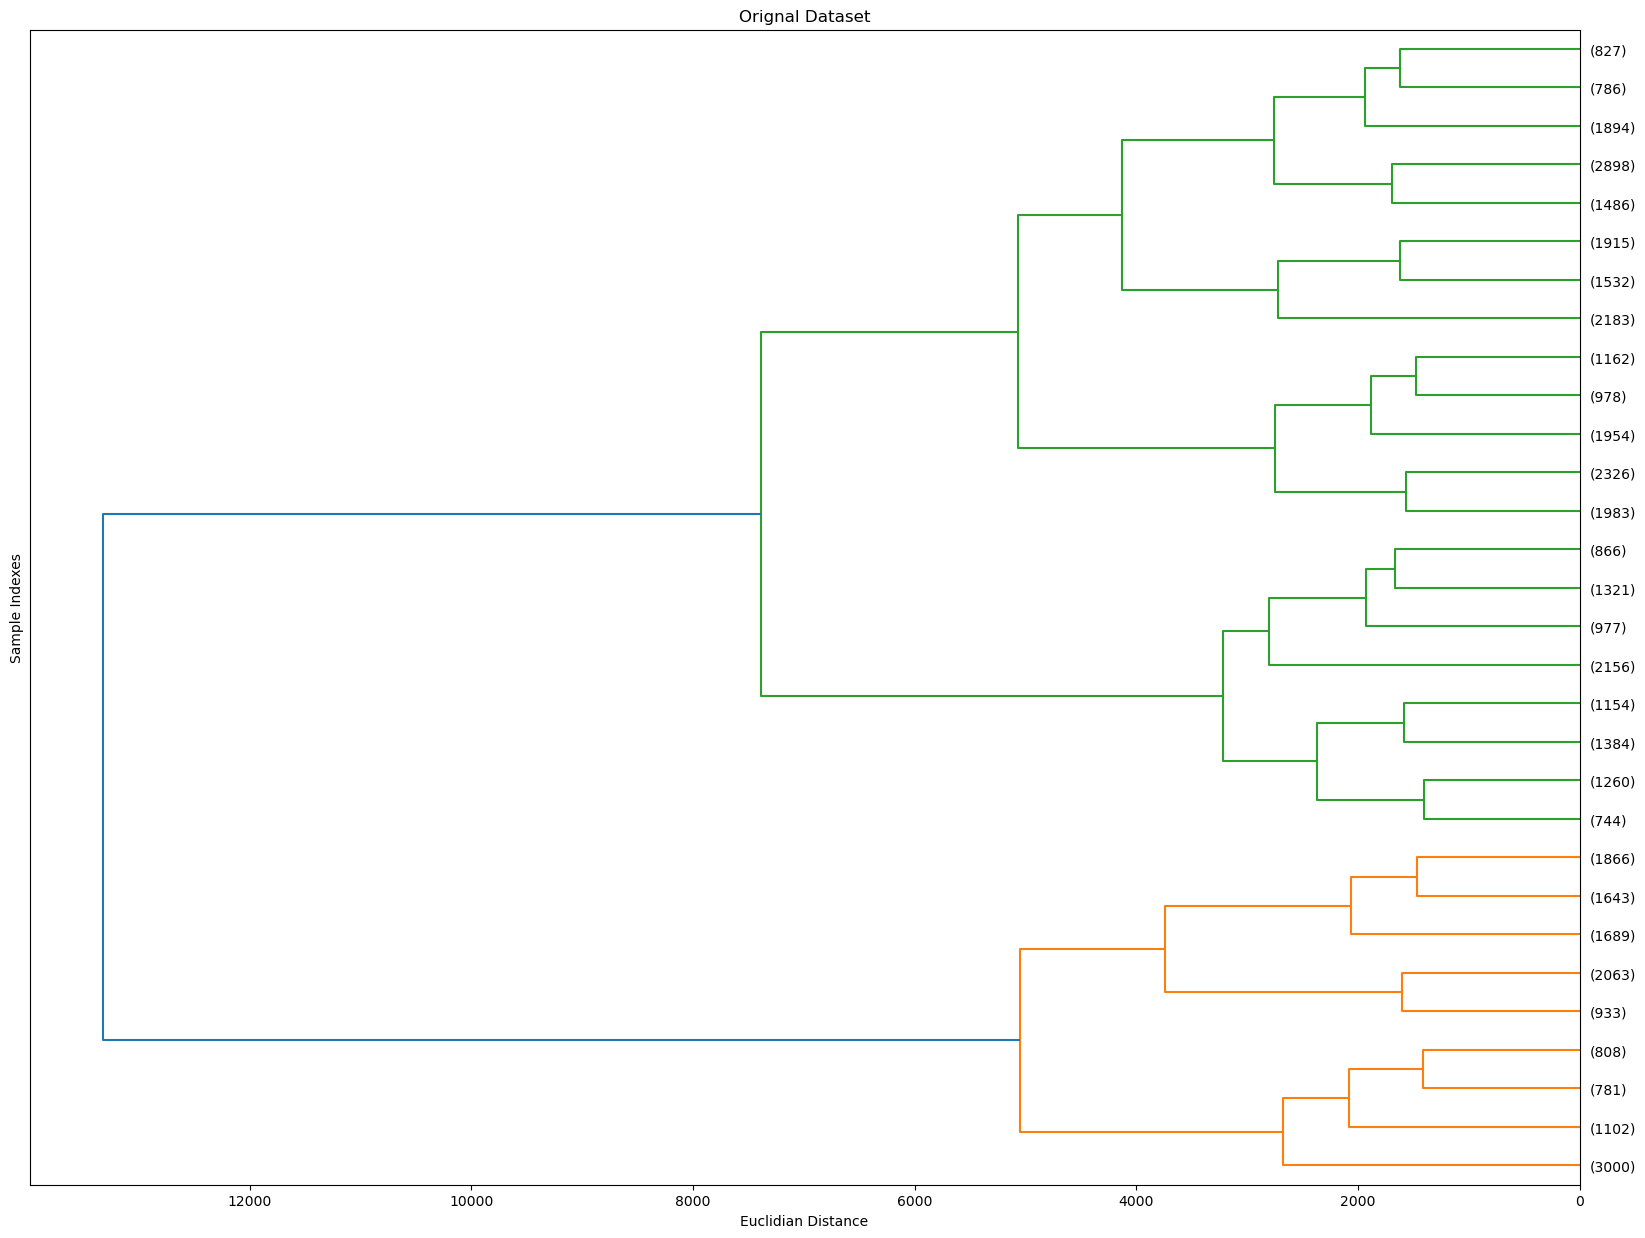

In [68]:
# Original
originalHC = linkage(songsOriginal.to_numpy(dtype='float16'), 'ward')

# Plot
fig, ax = plt.subplots(figsize=(20, 15))
dendrogram(originalHC, truncate_mode='lastp', orientation='left')  # truncate helps w/ graph readability
plt.title('Orignal Dataset')
ax.set_xlabel('Euclidian Distance')
ax.set_ylabel('Sample Indexes')
plt.show()

In [59]:
# Calculate Cophenetic Correlation Coefficent for Original
#linkageArray = linkage(pdist(songsOriginal.to_numpy(dtype='float16')), 'ward')
c, cophDist = cophenet(originalHC, pdist(songsOriginal.to_numpy(dtype='float16')))
print(f"Cophenetic Correlation Coefficient: {c}")

Cophenetic Correlation Coefficient: 0.5216144762987047


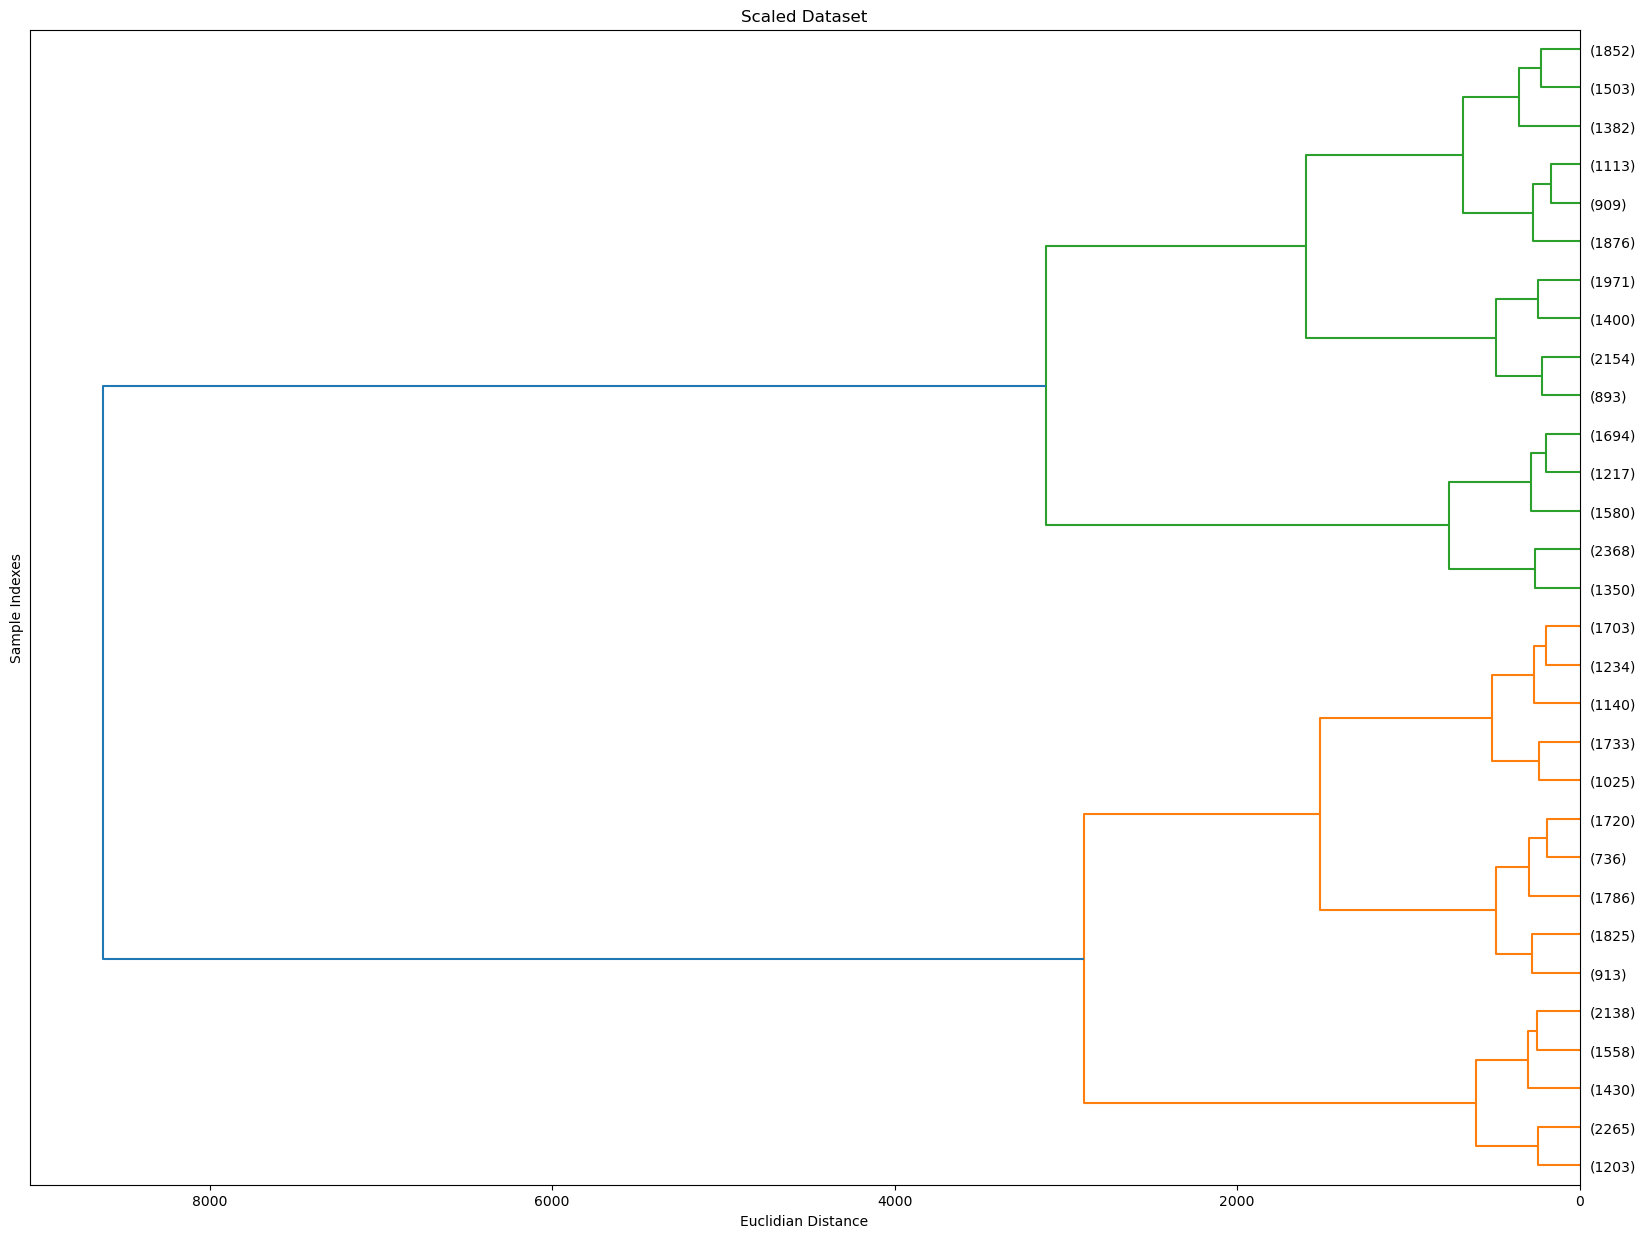

In [69]:
# Scaled
scaledHC = linkage(songsScaled.to_numpy(dtype='float16'), 'ward')

# Plot
fig, ax = plt.subplots(figsize=(20, 15))
dendrogram(scaledHC, truncate_mode='lastp', orientation='left')
plt.title('Scaled Dataset')
ax.set_xlabel('Euclidian Distance')
ax.set_ylabel('Sample Indexes')
plt.show()

In [62]:
# Calculate Cophenetic Correlation Coefficent for Scaled
c, cophDist = cophenet(scaledHC, pdist(songsScaled.to_numpy(dtype='float16')))
print(f"Cophenetic Correlation Coefficient: {c}")

Cophenetic Correlation Coefficient: 0.7339402167996885


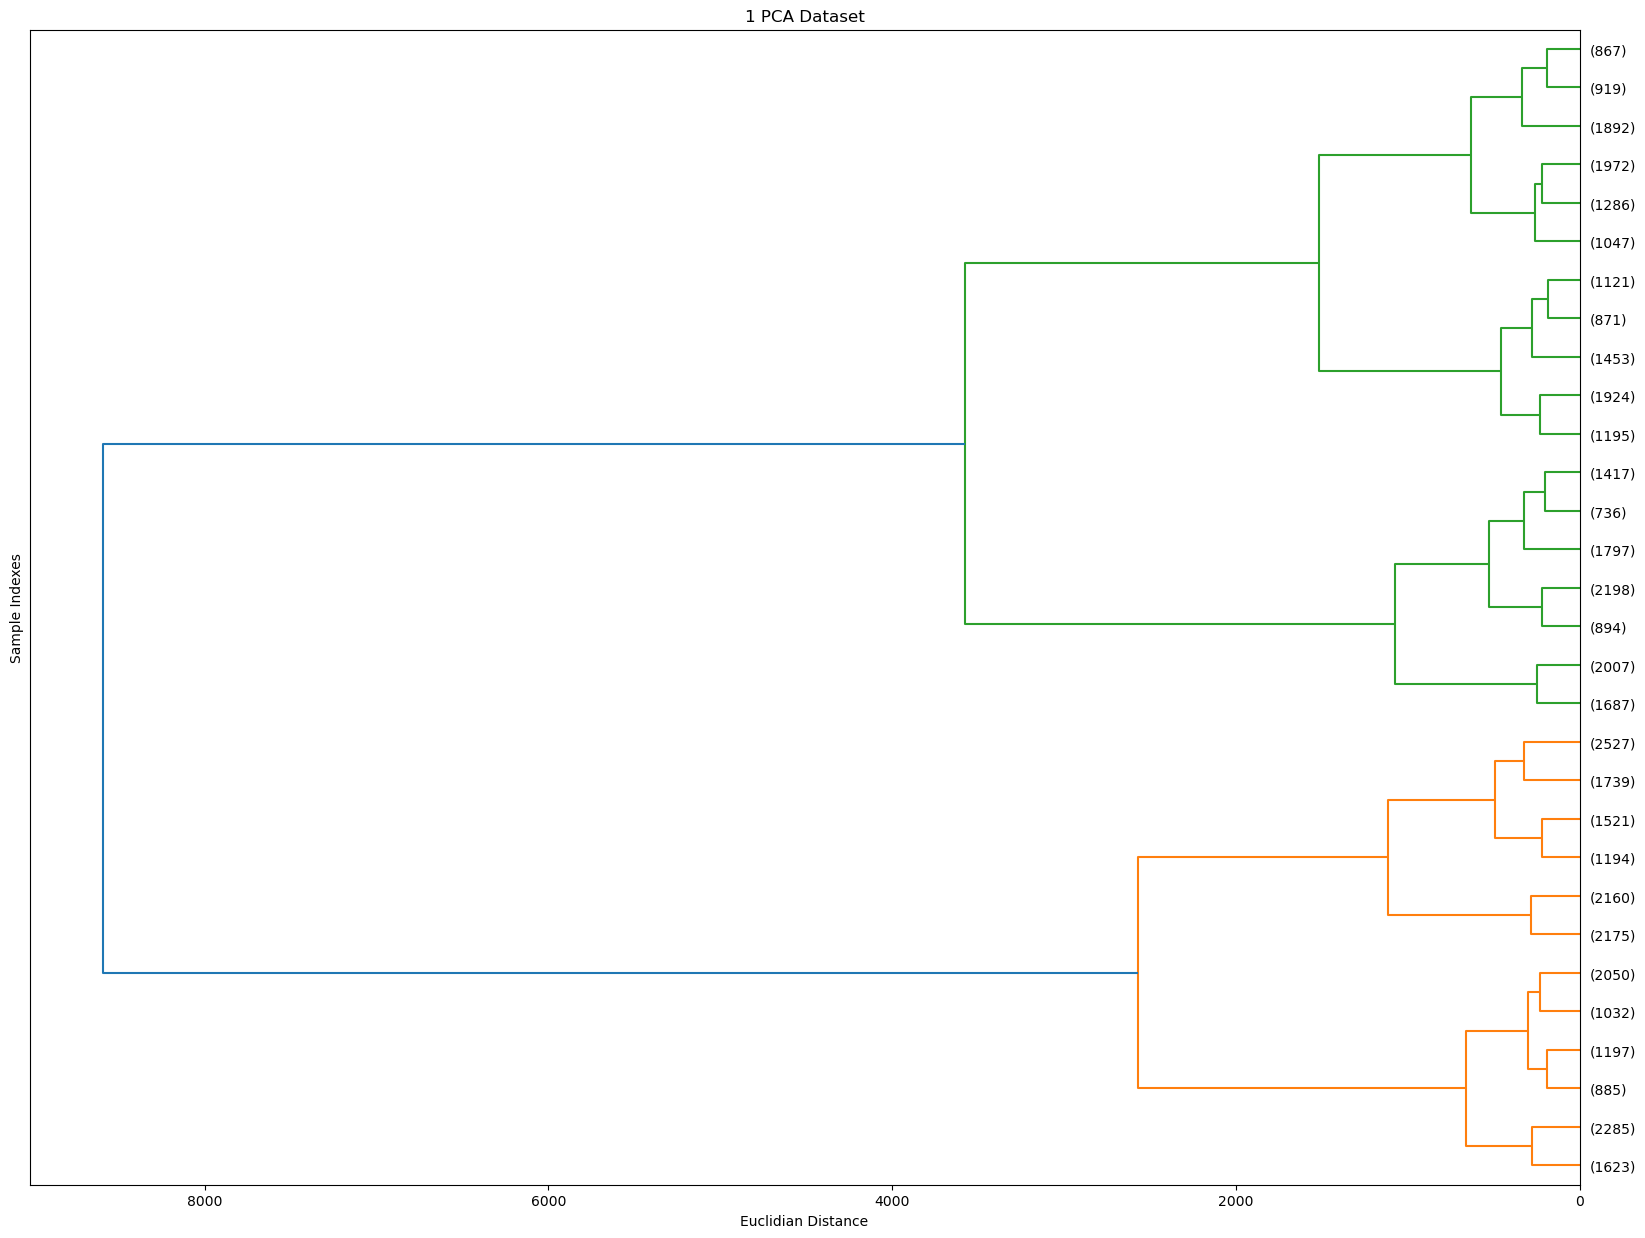

In [70]:
# 1 PCA
pca1HC = linkage(songs1PCA, 'ward')

# Plot
fig, ax = plt.subplots(figsize=(20, 15))
dendrogram(pca1HC, truncate_mode='lastp', orientation='left')
plt.title('1 PCA Dataset')
ax.set_xlabel('Euclidian Distance')
ax.set_ylabel('Sample Indexes')
plt.show()

In [64]:
# Calculate Cophenetic Correlation Coefficent for 1 PCA 
c, cophDist = cophenet(pca1HC, pdist(songs1PCA))
print(f"Cophenetic Correlation Coefficient: {c}")

Cophenetic Correlation Coefficient: 0.7375035193085633


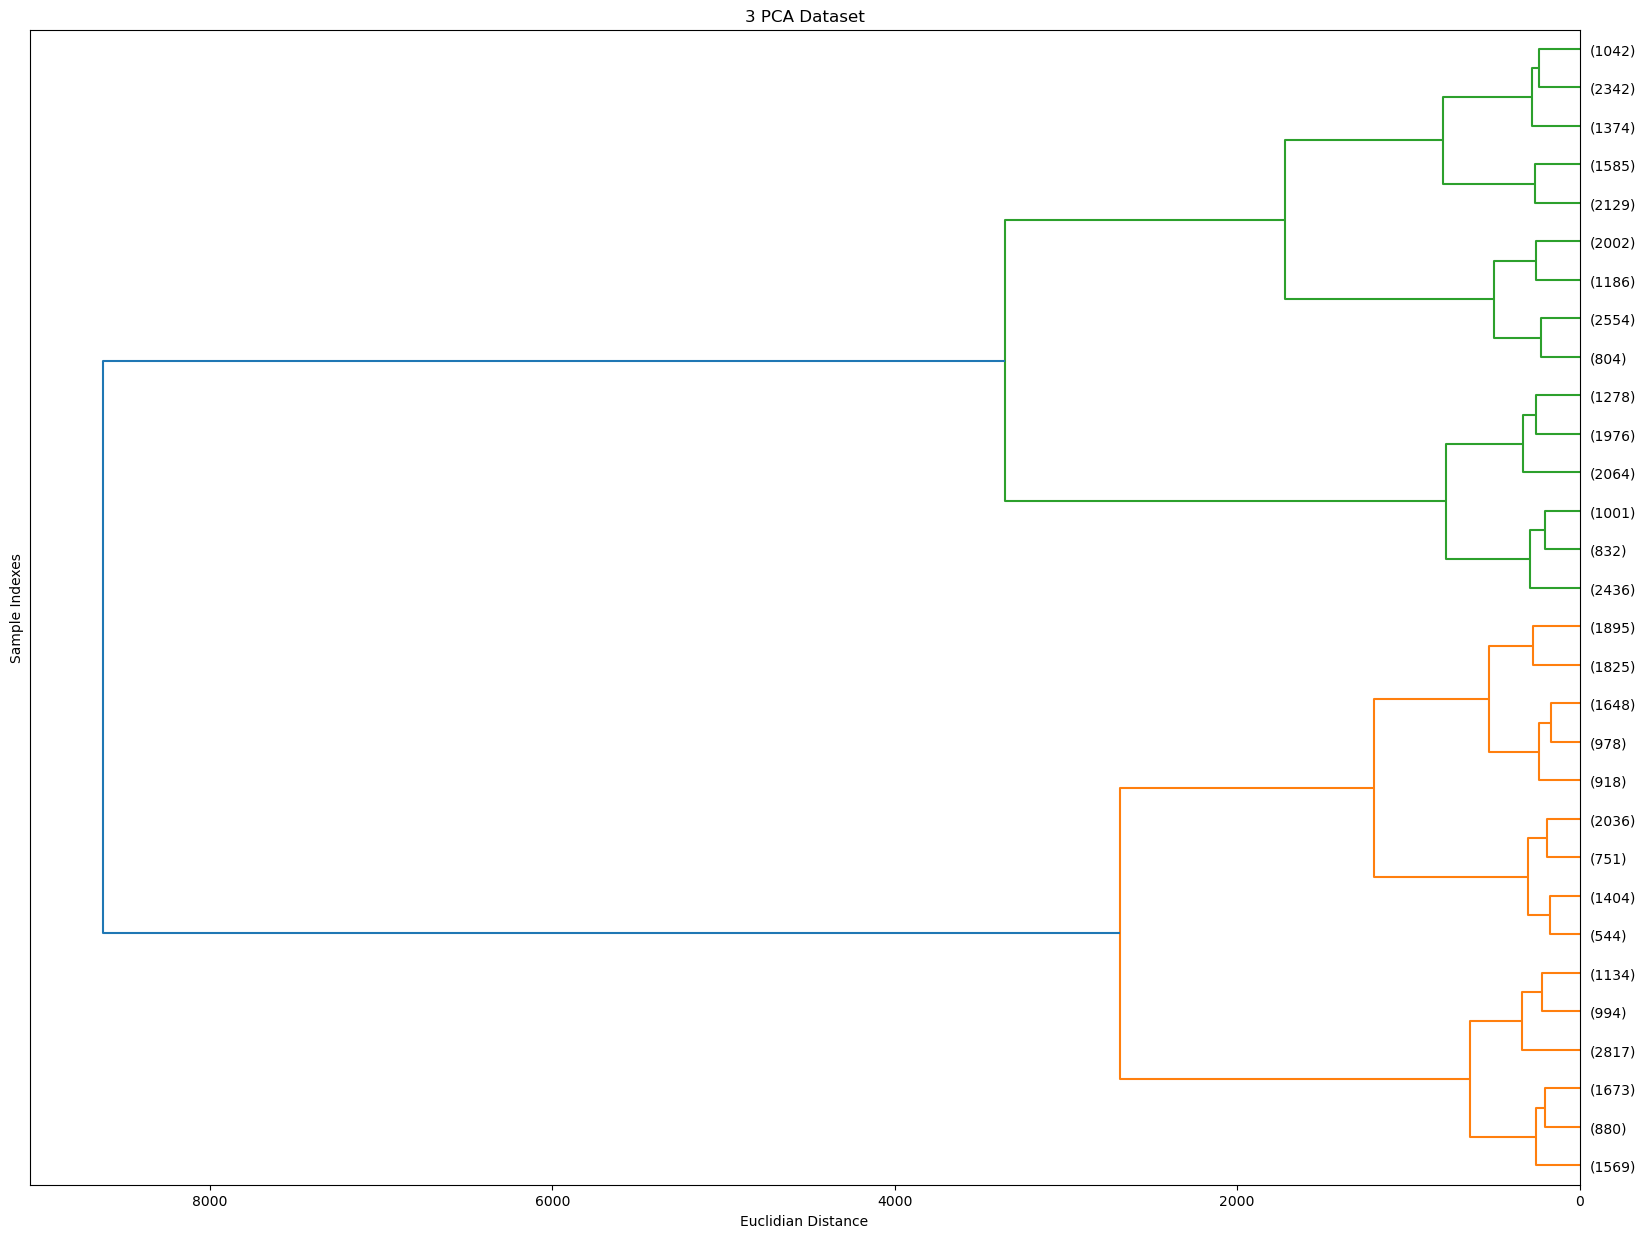

In [71]:
# 3 PCA
pca3HC = linkage(songs3PCA, 'ward')

# Plot
fig, ax = plt.subplots(figsize=(20, 15))
dendrogram(pca3HC, truncate_mode='lastp', orientation='left')
plt.title('3 PCA Dataset')
ax.set_xlabel('Euclidian Distance')
ax.set_ylabel('Sample Indexes')
plt.show()

In [67]:
# Calculate Cophenetic Correlation Coefficent for Original
c, cophDist = cophenet(pca3HC, pdist(songs3PCA))
print(f"Cophenetic Correlation Coefficient: {c}")

Cophenetic Correlation Coefficient: 0.738217522691261


The Cophenetic Correlation Coefficient is another way to assess the validity and consistency of clusters that looks to determine how well the dendrogram preserves the distances between the original datapoints. It serves as a good measure of how well the hirearichal clustering is actually representing our data. We get pretty good measures here with the clustering on each dataset here, not having any of the coefficents dip  below .5. Our highest measured is with the 3 PCA dataset at .738, albeit by a slim margin considering the scaled and 1 PCA dataset also round up to .74. All of the clusterings provided two clusters, excluding the cluster that contains everything of course. Let's look at the samples that were given by the clustering to get a better idea of what our clusters are representing. We will be sticking with the songs3PCA dataset for the rest of the analysis.  

In [75]:
# Give english labels to genre back for readability
temp = songs3PCA.copy()
genres = ['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'power-pop', 'progressive-house', 'psych-rock', 'punk-rock',
       'punk', 'r-n-b', 'reggae', 'reggaeton', 'rock-n-roll', 'rock',
       'rockabilly', 'romance', 'sad', 'salsa', 'samba', 'sertanejo',
       'show-tunes', 'singer-songwriter', 'ska', 'sleep', 'songwriter',
       'soul', 'spanish', 'study', 'swedish', 'synth-pop', 'tango',
       'techno', 'trance', 'trip-hop', 'turkish', 'world-music']

# Convert Genres to Numbers
genreCount = len(genres)
while genreCount > 0:

    for genre in genres:

        temp['track_genre'] = temp['track_genre'].replace(genreCount, genre) 

        # Update tickers
        genres.remove(genre)
        genreCount = len(genres)

# Sample Indexes
cluster1Indexes = [1042, 2342, 1374, 1585, 2129, 2002, 1186, 2554, 804, 1278, 1976, 2064, 1001, 832, 2436]
cluster2Indexes = [1895, 1825, 1648, 978, 918, 2036, 751, 1404, 544, 1134, 994, 2817, 1673, 880, 1569]

# Print Genres in Each Cluster
print('Cluster 1 (Green):')
for i in cluster1Indexes:
    print(temp.iloc[i])
    print()

print()
print('Cluster 2 (Orange):')
for i in cluster2Indexes:
    print(temp.iloc[i])
    print()

Cluster 1 (Green):
acousticness           0.737
liveness               0.098
track_genre         afrobeat
duration_sec        2.309526
energetic_loud     -1.336717
upbeat_happy       -0.144603
musical_measures    3.738292
Name: 1736, dtype: object

acousticness           0.966
liveness               0.134
track_genre          ambient
duration_sec       -0.210309
energetic_loud     -1.627648
upbeat_happy        0.004835
musical_measures     -4.2773
Name: 4880, dtype: object

acousticness         0.00167
liveness               0.154
track_genre         alt-rock
duration_sec       -0.117056
energetic_loud      1.421041
upbeat_happy       -0.155283
musical_measures   -3.280227
Name: 2431, dtype: object

acousticness        0.000769
liveness               0.188
track_genre         alt-rock
duration_sec        0.582441
energetic_loud      0.856182
upbeat_happy        0.009195
musical_measures   -4.261223
Name: 2854, dtype: object

acousticness          0.0968
liveness                 0.1
tra

Looking more into the samples, it is again a bit unclear how exactly these clusters can be described just based of off reading these samples alone. One can only assume that the clusters are representative of softer music versus more intensive music, ranging on a wide spectrum. Again, it is hard to determine due to not being able to listen to the music directly and also to not being able to fully see the full range of genres that are within each genre. Taking into account our high Cophenetic Correlation Coefficent though, we can conclude that our clustering would give good, consistent groupings for our clusterings. It may be worth looking into other metrics to gauge a track for it's genre that we can add into the dataset to potentially work towards a model that can more clearly define songs by genre. This model seems to be doing a generalization of the overarching mood that can be achieved through the songs. 